# I. Prepararea datelor

### Vom previzualiza datele, pentru a intelege mai bine setul de date cu care vom lucra:

Importam librariile necesare pentru desfasurarea diferitelor metode:

In [1]:
import numpy as np #pentru algebra
import pandas as pd #for procesarea datelor
import matplotlib.pyplot as plt #pentru grafice
import seaborn as sns #pentru grafice mai 'frumoase'
import missingno as msno #pentru outlieri
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
import shap

Citim setul de date:

In [2]:
path = r'C:\Users\nidfo\Desktop\TTJ\Proiect TTJ BCR\TTJ project\dataset\dataset.csv'

In [3]:
data = pd.read_csv(path)

Previzionam setul de date:

In [4]:
data.shape

(10127, 21)

In [5]:
data.head(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40.0,F,4.0,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51.0,M,4.0,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32.0,M,0.0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37.0,M,3.0,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48.0,M,2.0,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [6]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10124 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10122 non-null  float64
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10125 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Cateva detalii despre valorile setului de date:

In [8]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10124.000000,10122.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.326057,2.345781,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.017889,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
data.describe(include = ['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10125,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3560,9436


Verificam ce atribute au valori lipsa:

In [10]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   3
Gender                         0
Dependent_count                5
Education_Level             1519
Marital_Status               749
Income_Category                2
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Used_Bal                 0
Total_Unused_Bal               0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<Axes: >

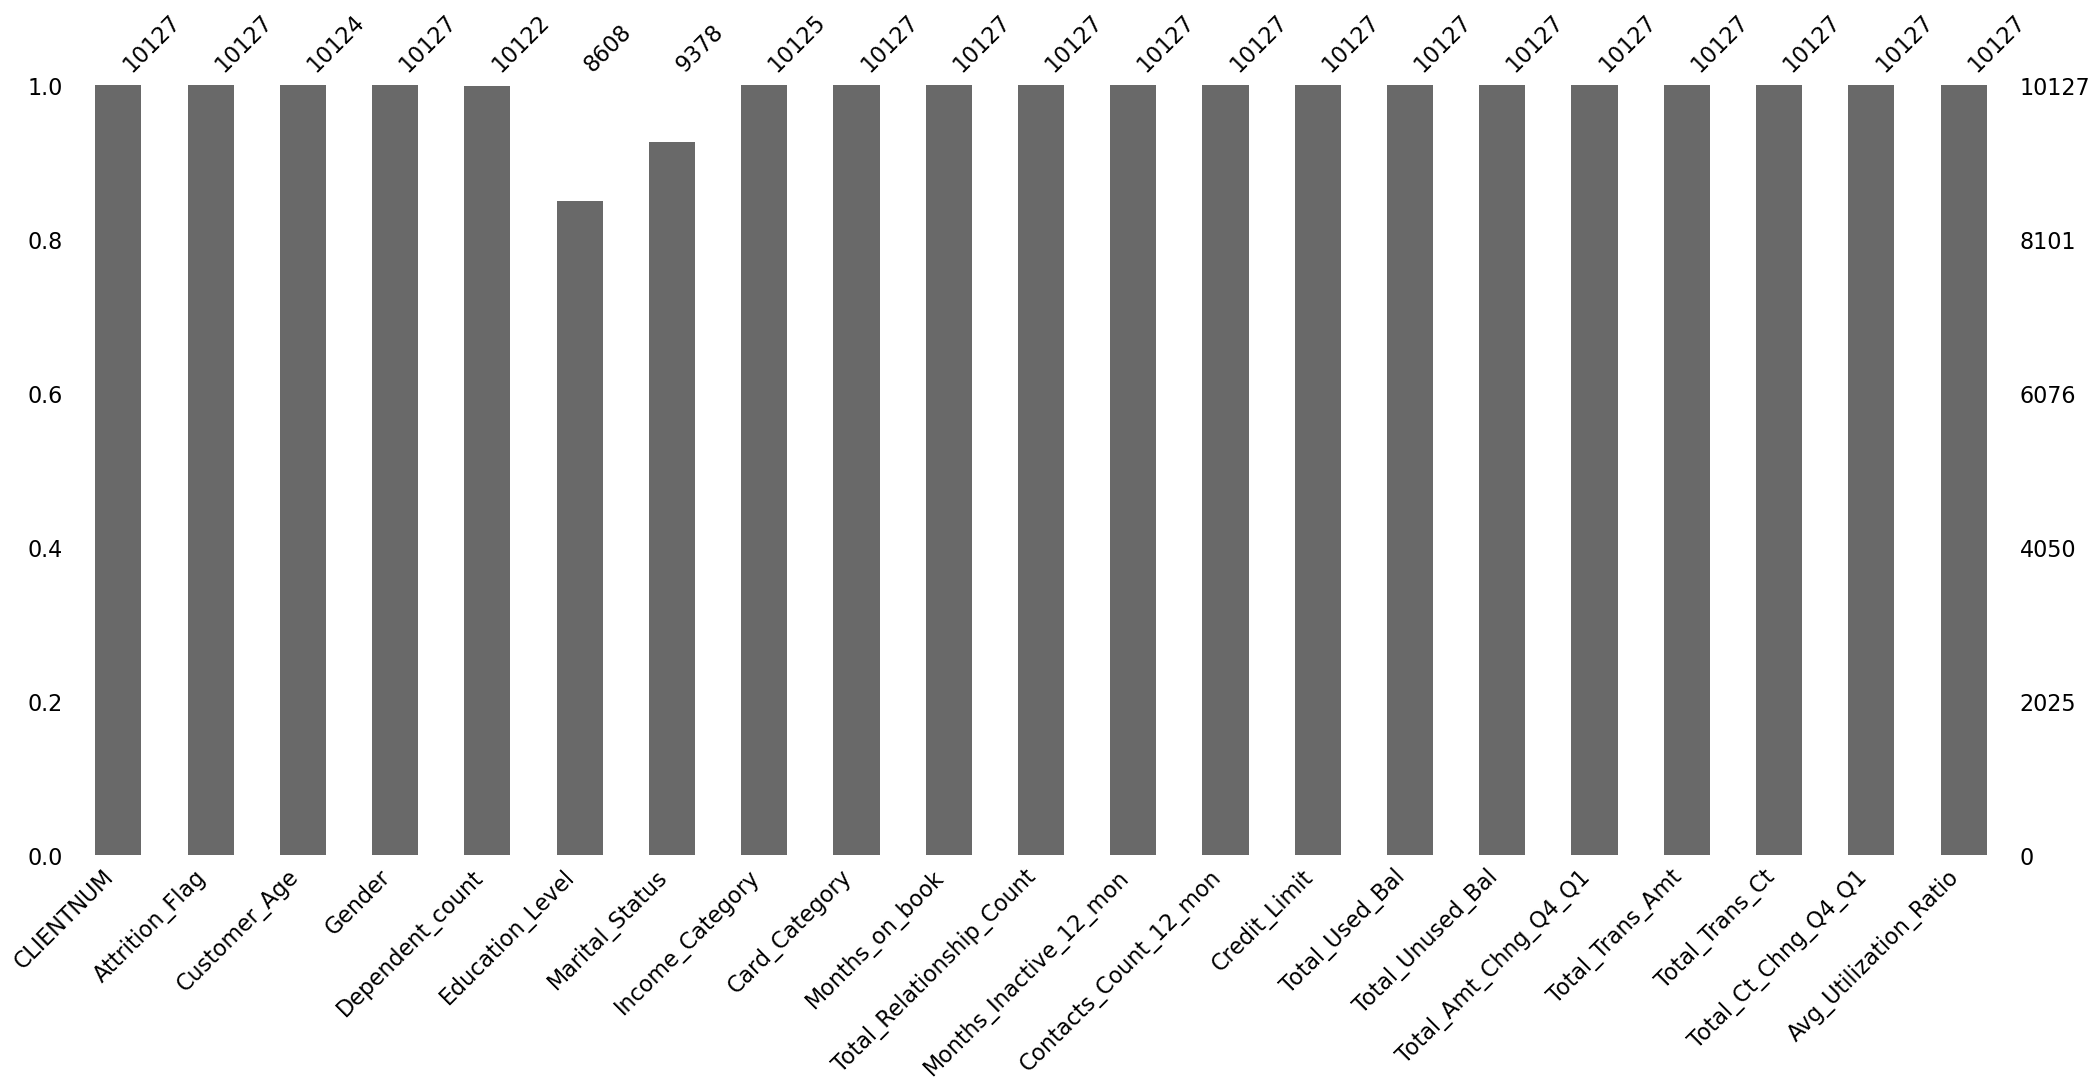

In [11]:
msno.bar(data)

Cele mai multe cazuri valori lipsa se regasesc pe coloanele Education_Level si Marital_Status, insa mai sunt cateva cazuri pe alte coloane.

Inlocuim valorile lipsa cu date de tip string de caractere:

In [12]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [13]:
#In cazul variabilelor numerice, pentru a le completa, adaugam valoarea mediei pentru fiecare observatie care avea valoarea lipsa
data['Customer_Age'] = data['Customer_Age'].fillna(data['Customer_Age'].mean())
data['Dependent_count'] = data['Dependent_count'].fillna(data['Dependent_count'].mean())

In [14]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<Axes: >

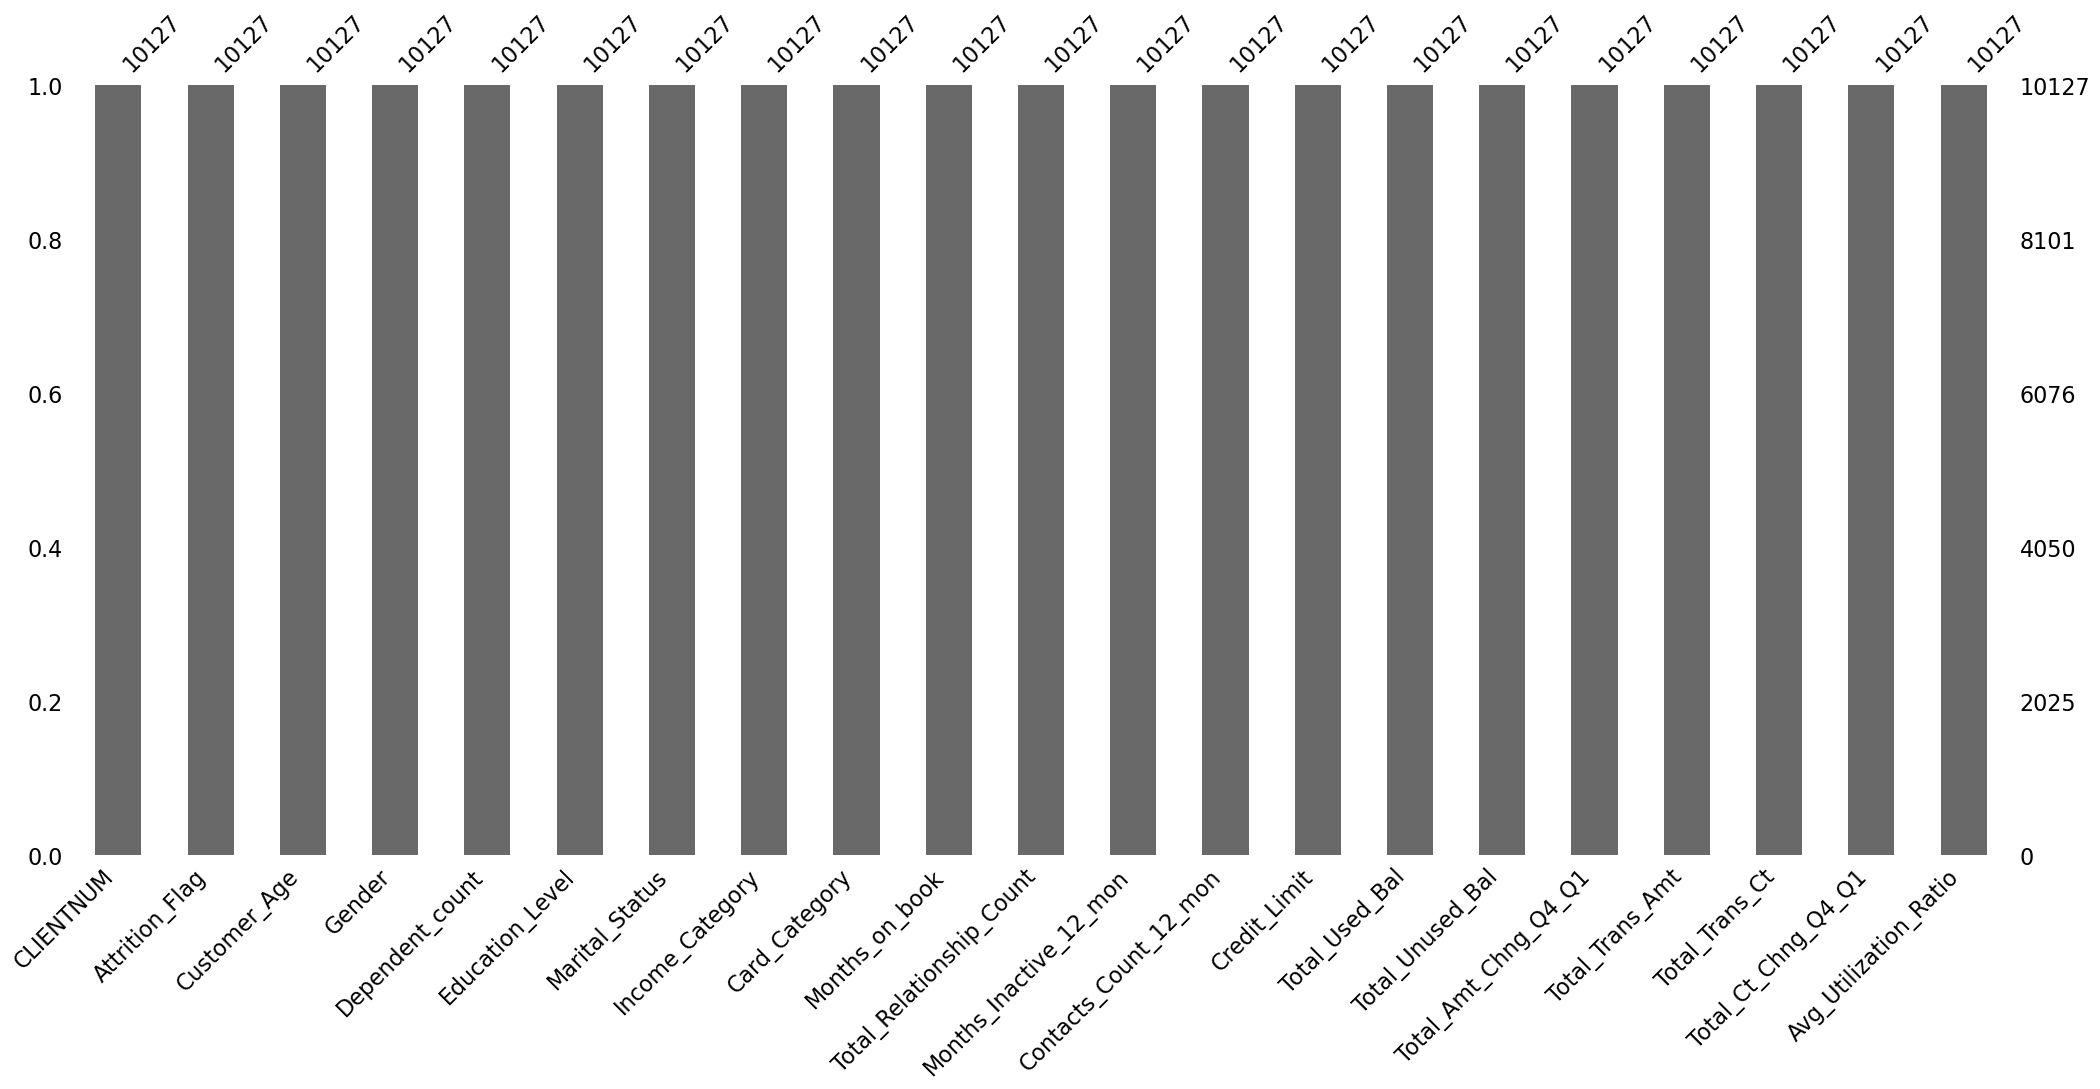

In [15]:
msno.bar(data)

## Analiza pe coloane

### Variabila tinta (Target) - Attrition_Flag
Vrem sa analizam care sunt clientii cei mai probabil sa renunte la serviciile bancii.
Pentru acest lucru, trebuie sa cercetam care sunt cei mai importanti factori care conduc la decizia clientilor de a cauta serviciile altei banci.

Distributia variabilei target:

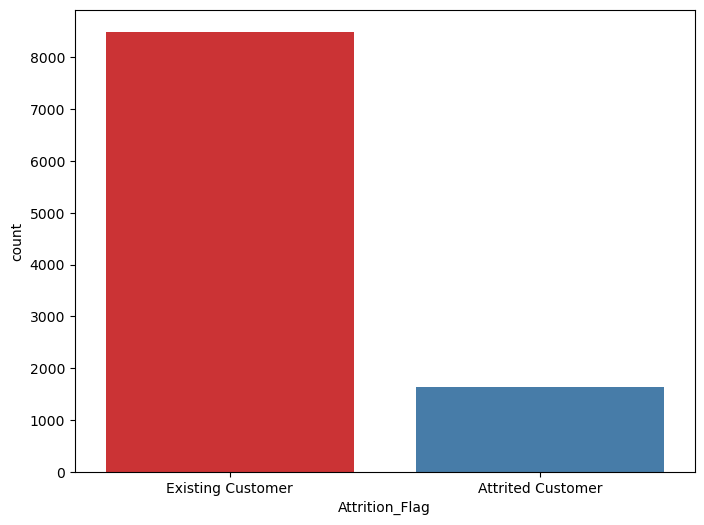

In [16]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Attrition_Flag', palette ='Set1')
plt.show()

### Variabile calitative (categorice)

Facem o lista cu toate coloanele calitative:

In [17]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [18]:
coloane_calitative = [col for col in data.columns if data[col].dtypes == 'object']
print(coloane_calitative)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [19]:
print('In setul nostru de date sunt', len(coloane_calitative), 'variabile de tip calitativ, acestea fiind: ', coloane_calitative)

In setul nostru de date sunt 6 variabile de tip calitativ, acestea fiind:  ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [20]:
data[coloane_calitative].nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    7
Card_Category      4
dtype: int64

In [21]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

Observam ca variabila target, 'Attrition_Flag', poate fi transformata in variabila de tip numar (valori de adevar, 1 sau 0), lucru care va fi de folos pentru analizele viitoare. Pentru a face acest lucru:

In [22]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

In [23]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [24]:
coloane_caltitative = coloane_calitative.remove('Attrition_Flag')
print(coloane_calitative)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [25]:
len(data['Attrition_Flag'])

10127

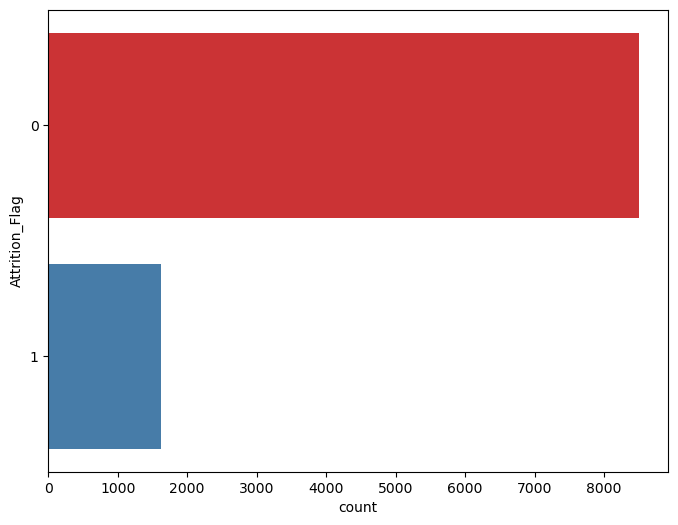

In [26]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, y = 'Attrition_Flag', palette ='Set1')
plt.show()

In [27]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [28]:
data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [29]:
data['Income_Category'].value_counts()

Less than $40K    3560
$40K - $60K       1789
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Unknown              2
Name: Income_Category, dtype: int64

### Variabile cantitative (numerice)

Identificam variabilele cantitative:

In [30]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [31]:
coloane_numerice = [col for col in data.columns if data[col].dtypes != 'object' and col != 'Attrition_Flag']
print(coloane_numerice)

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal', 'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


<Axes: >

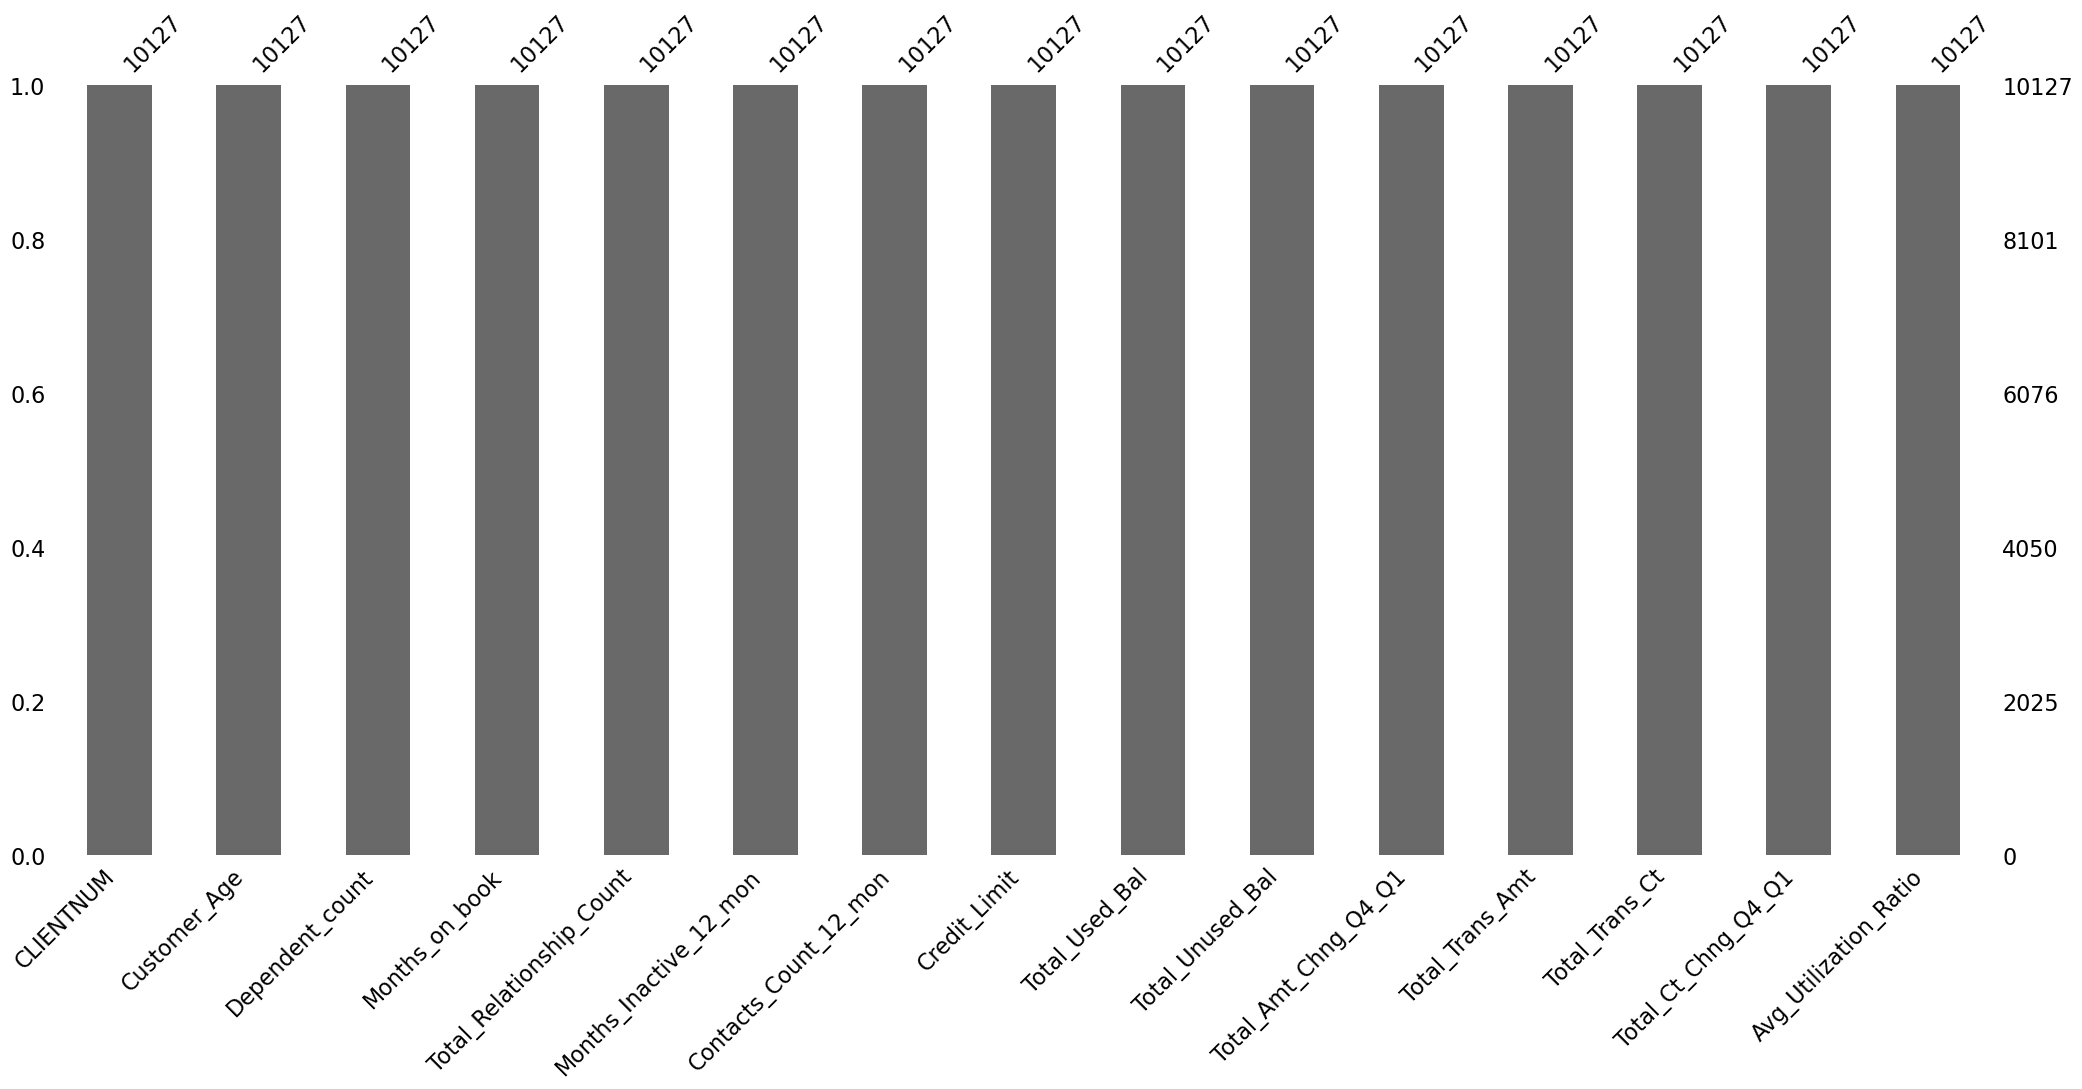

In [32]:
msno.bar(data[coloane_numerice])

In [33]:
data[coloane_numerice].isnull().sum()

CLIENTNUM                   0
Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [34]:
data[coloane_numerice].nunique()

CLIENTNUM                   10127
Customer_Age                   46
Dependent_count                 7
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Unused_Bal             6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

Analiza pe histograme a fiecarei variabile numerice in raport cu variabila target:

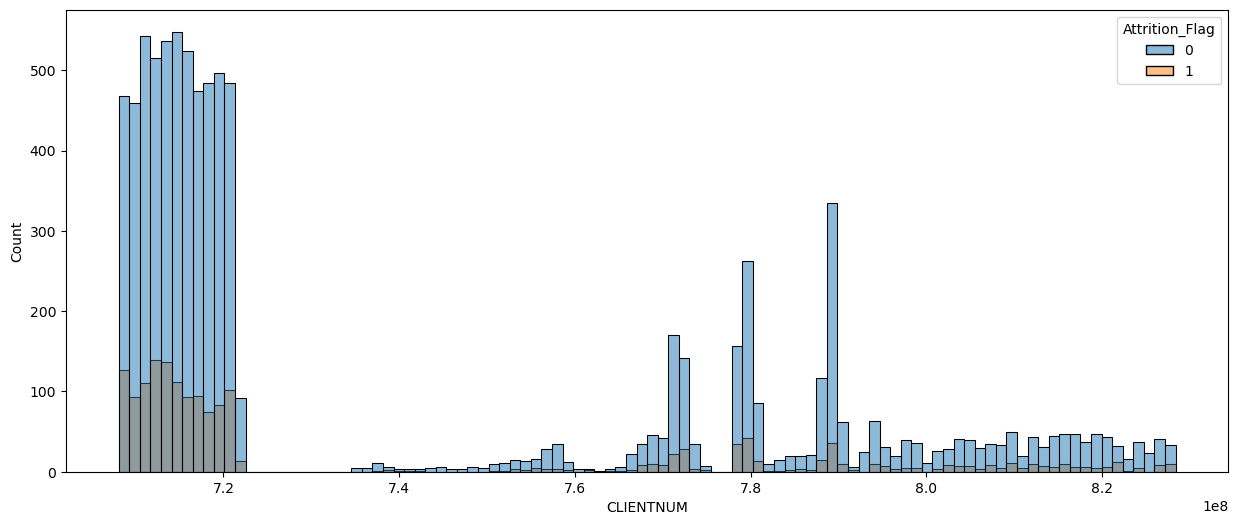

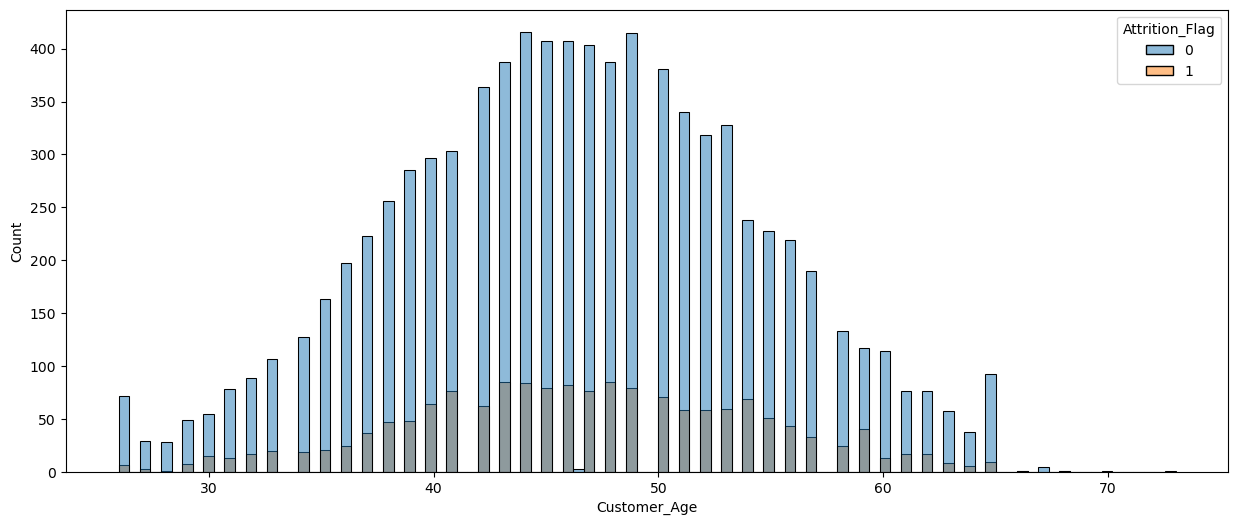

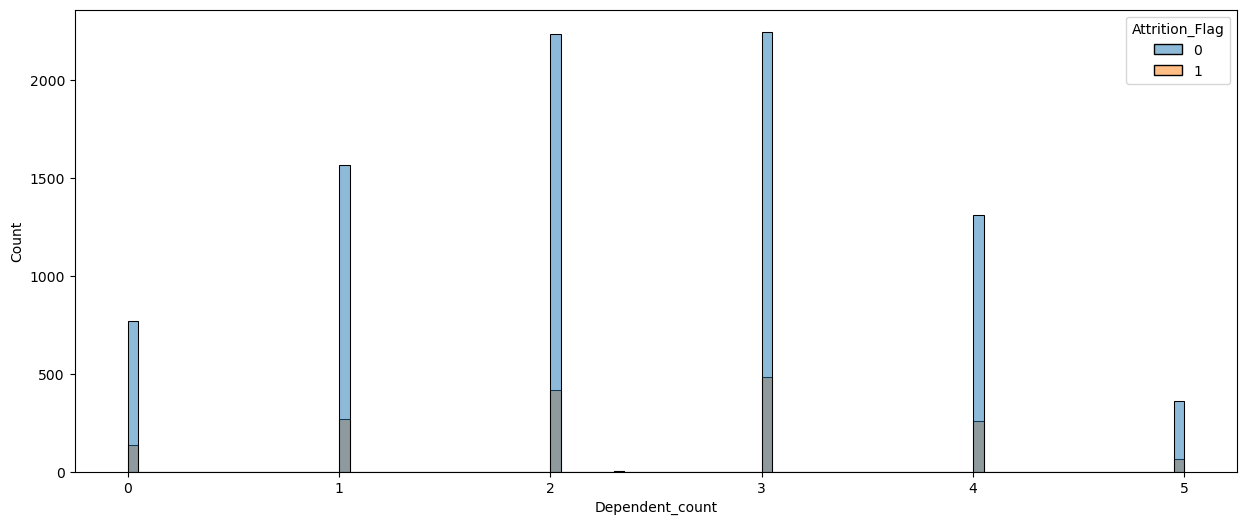

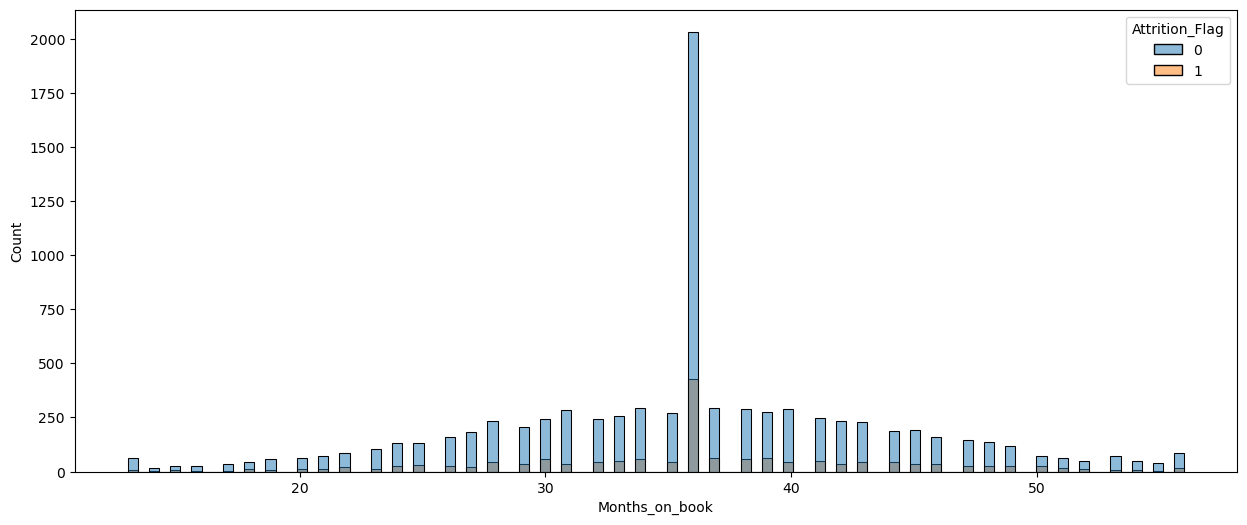

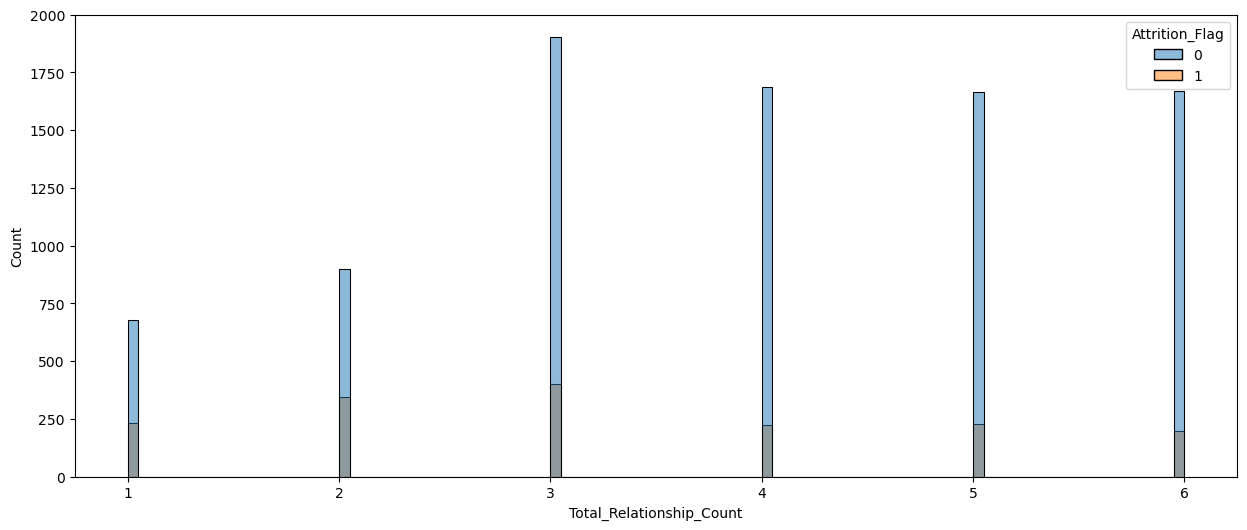

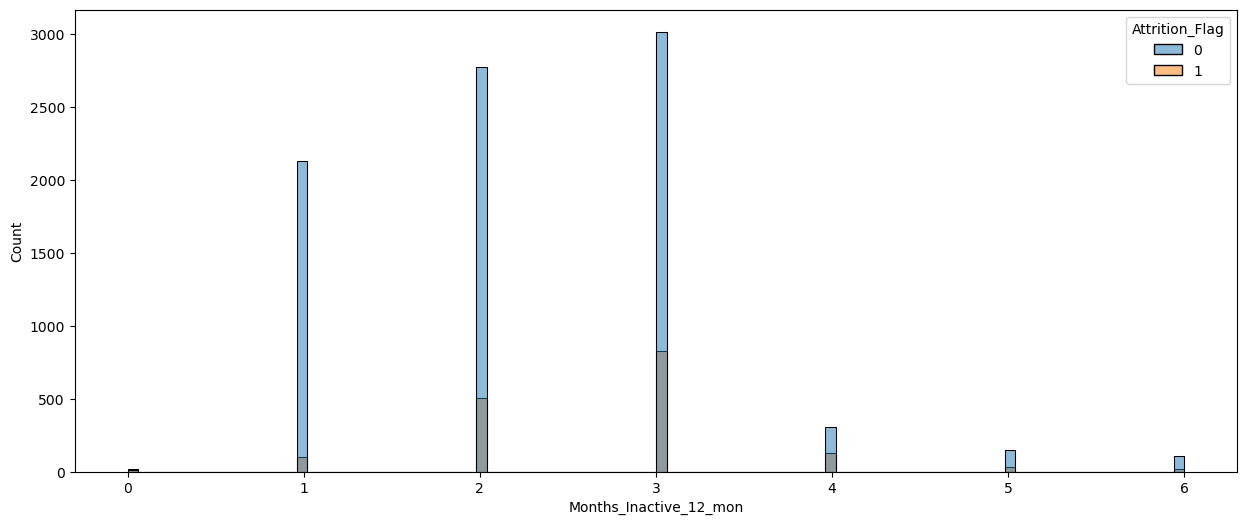

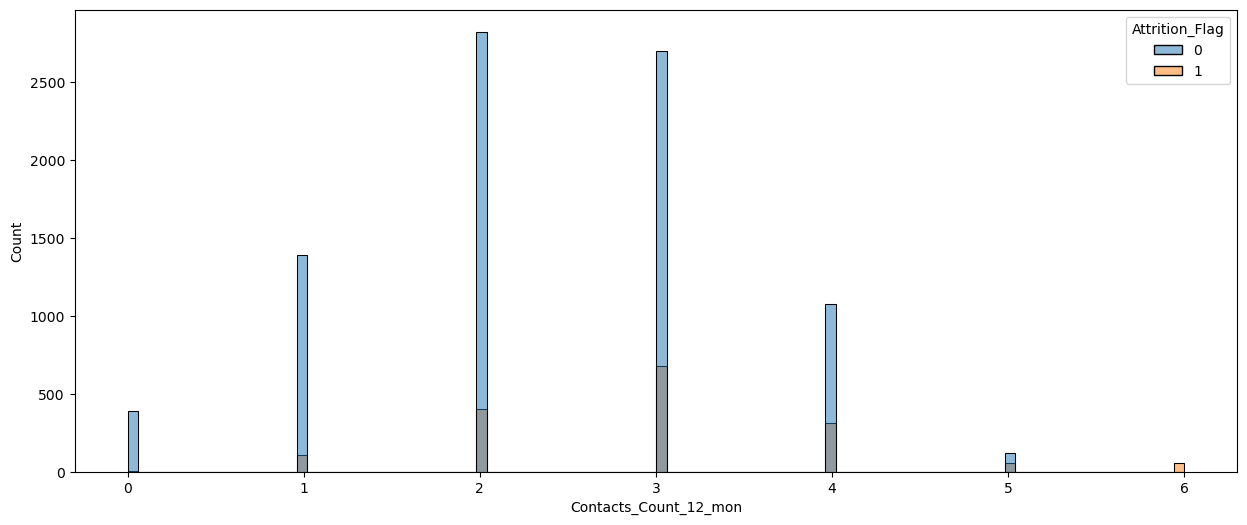

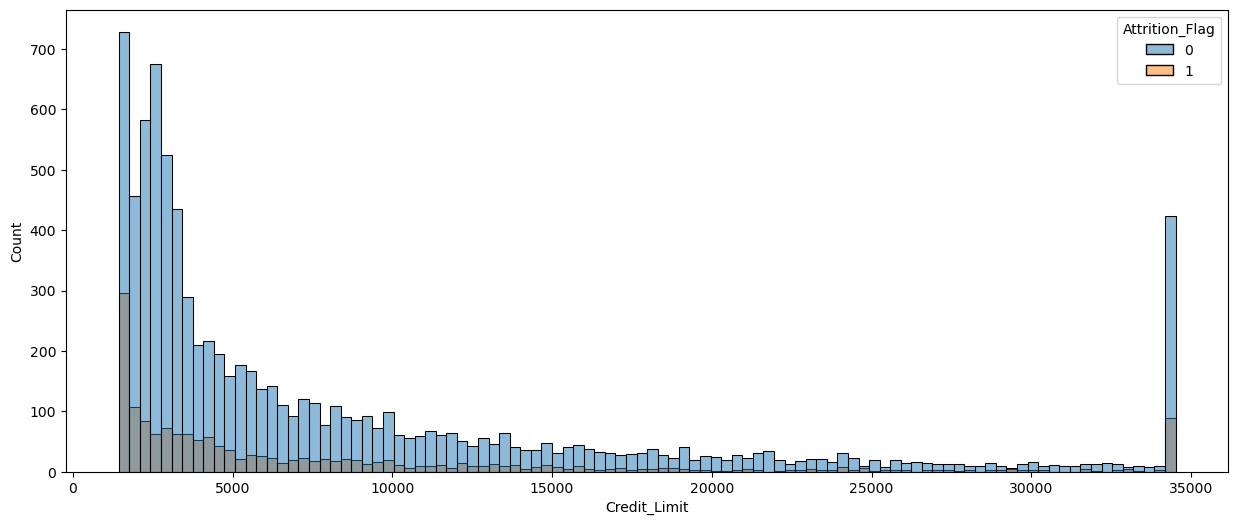

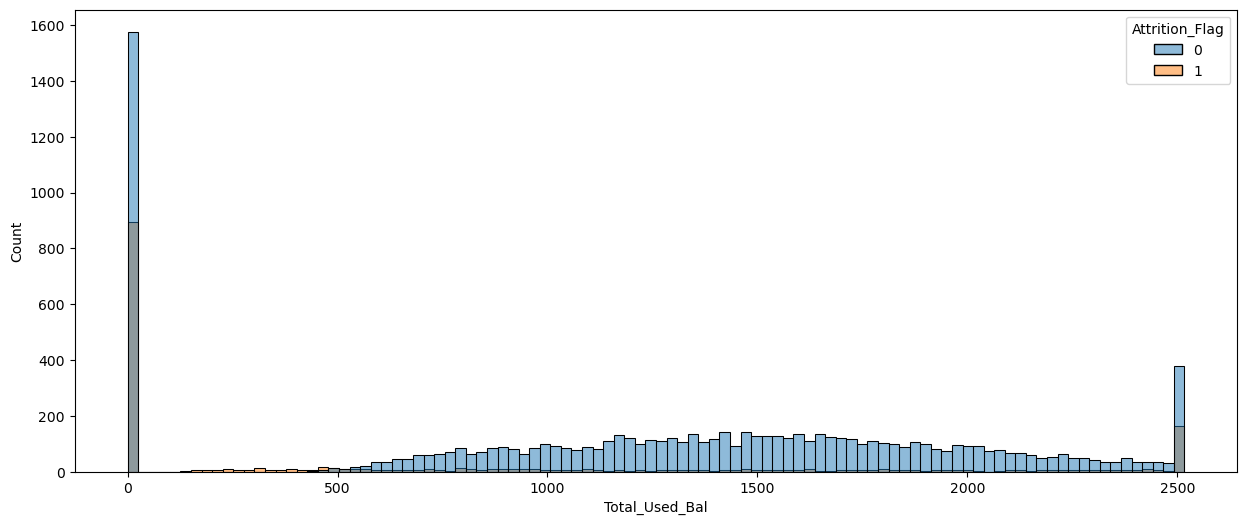

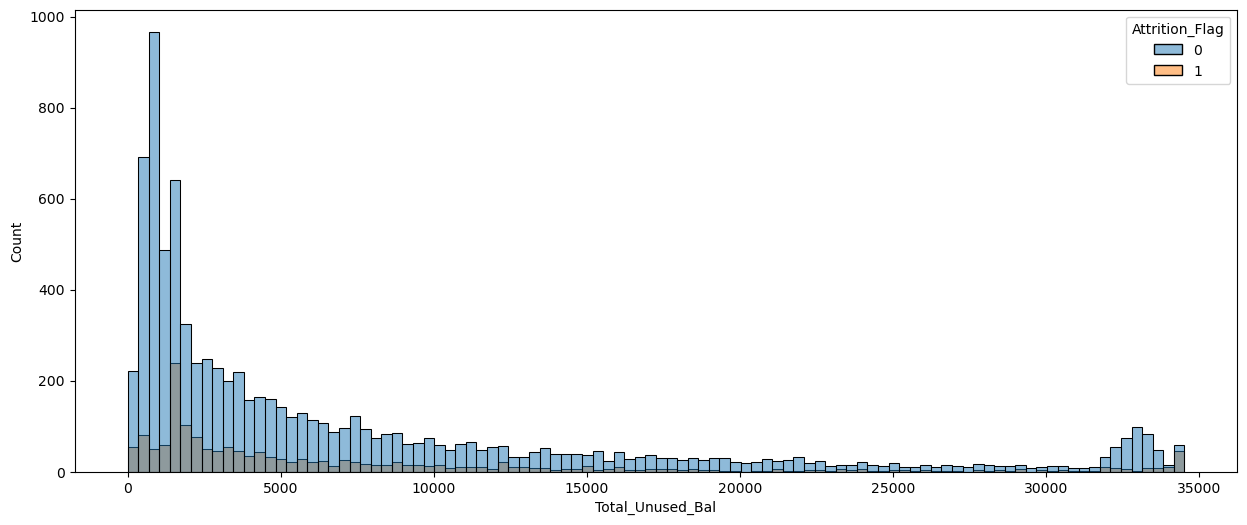

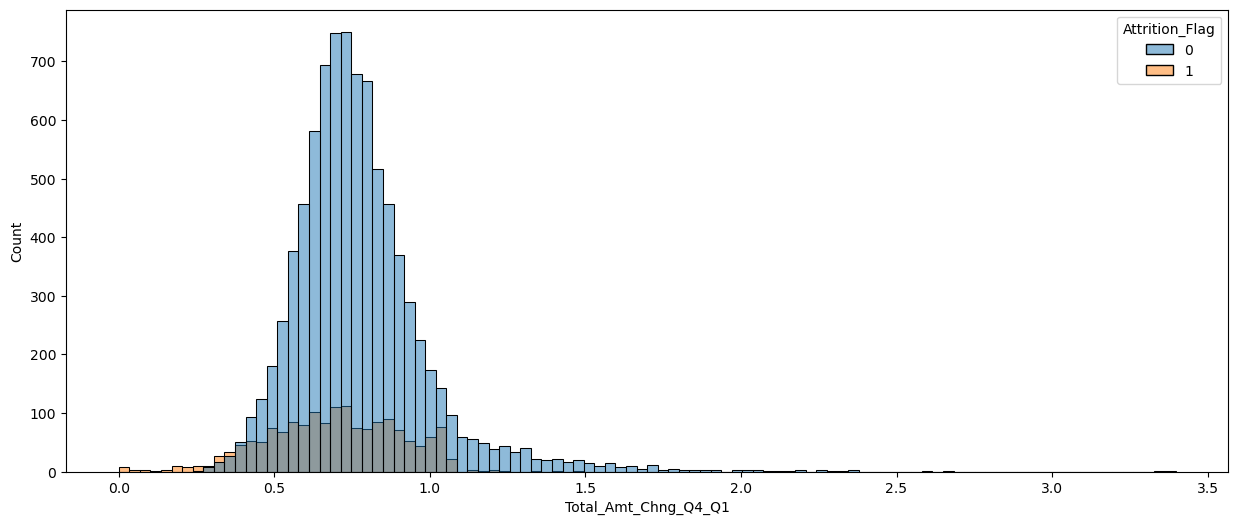

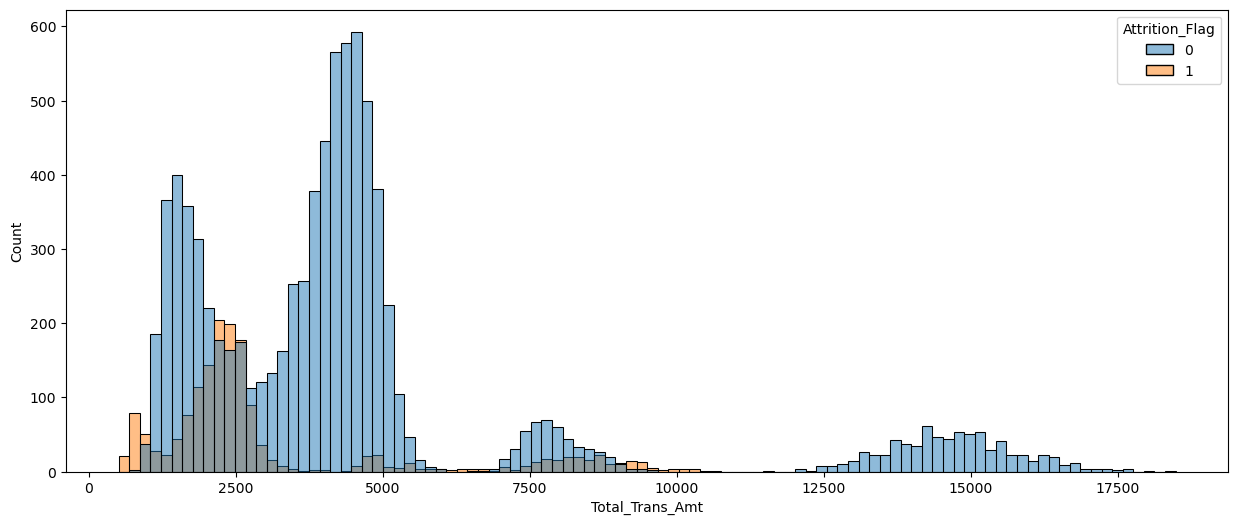

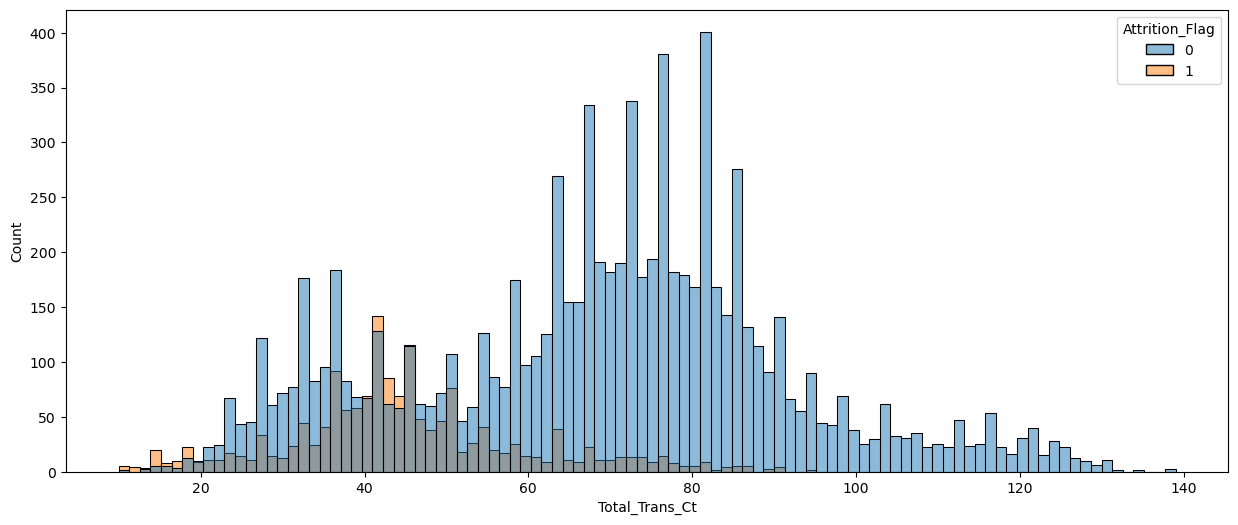

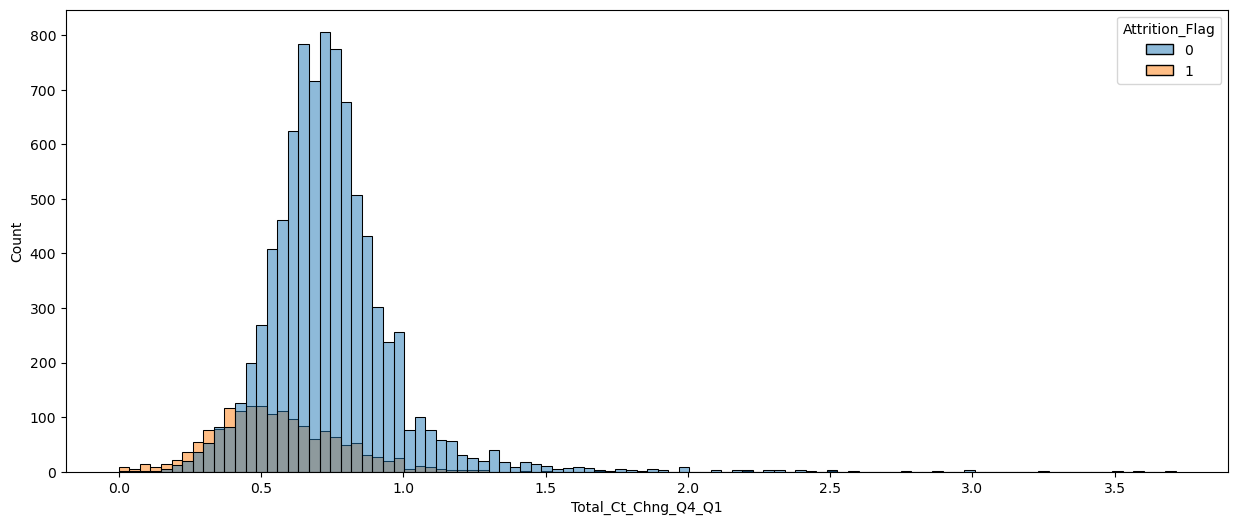

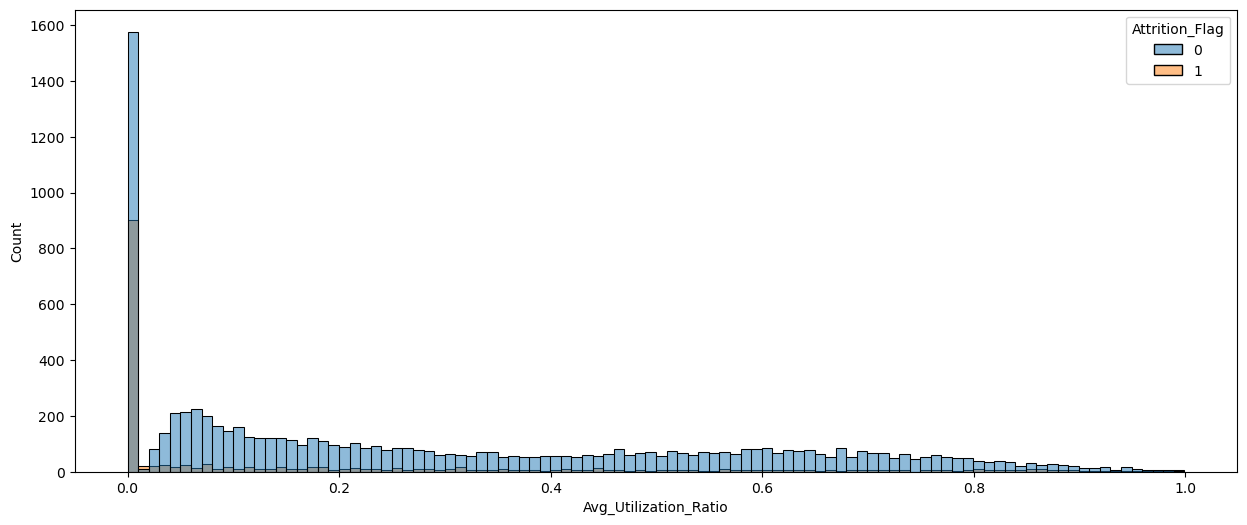

In [35]:
#graphics
for col in coloane_numerice:
    fig, ax = plt.subplots(figsize = (15,6))
    sns.histplot(data = data, x = col, hue = 'Attrition_Flag', bins = 100)
    plt.show()

Outlieri:

Verificam fiecare variabila numerica pentru outlieri:

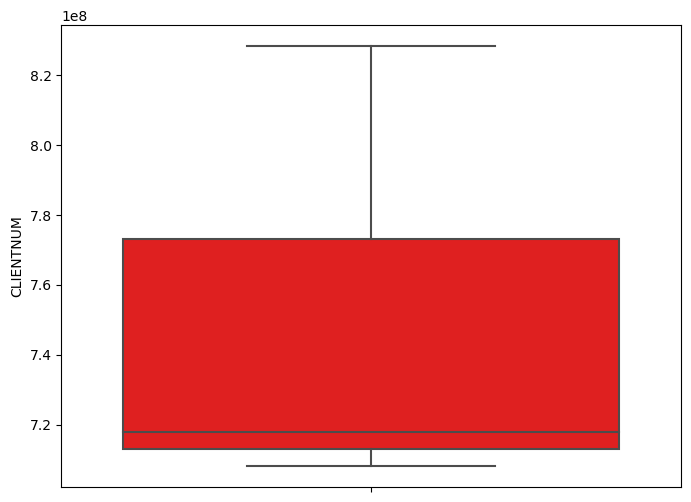

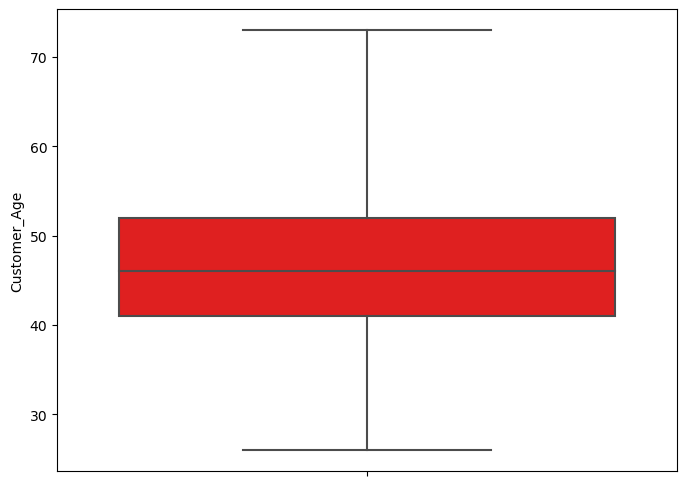

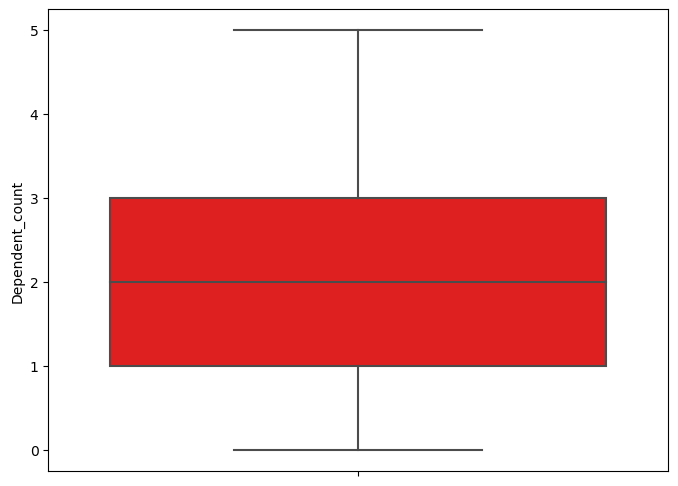

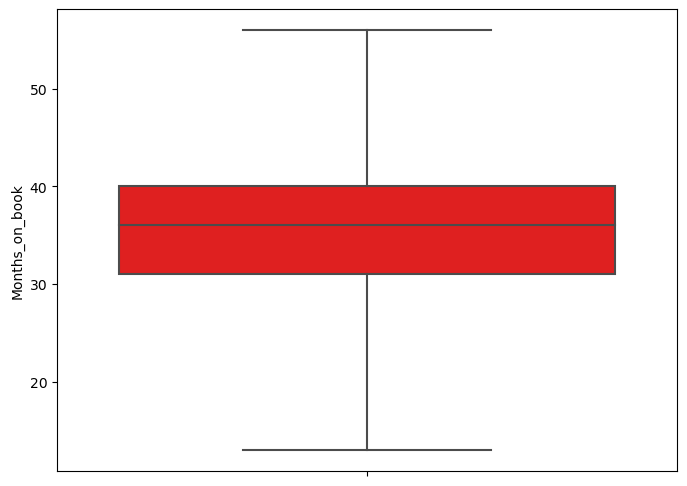

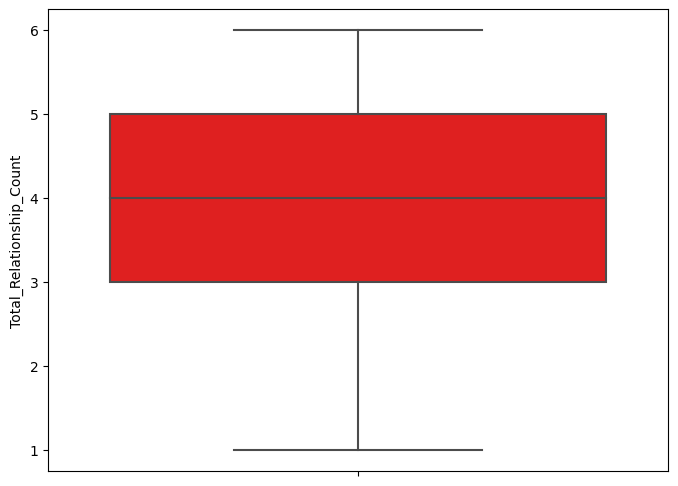

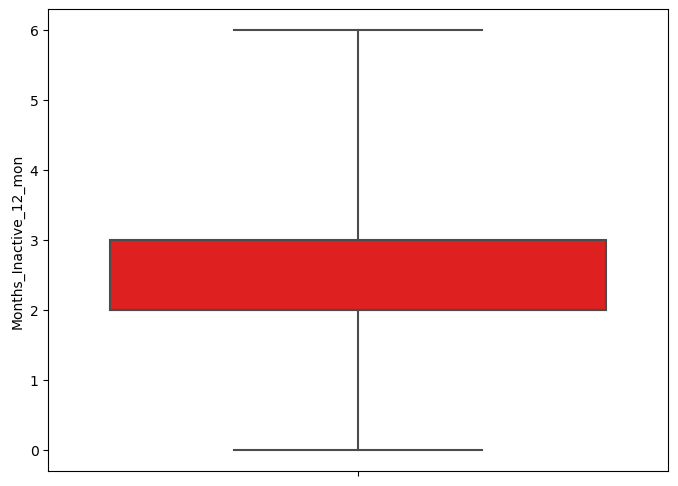

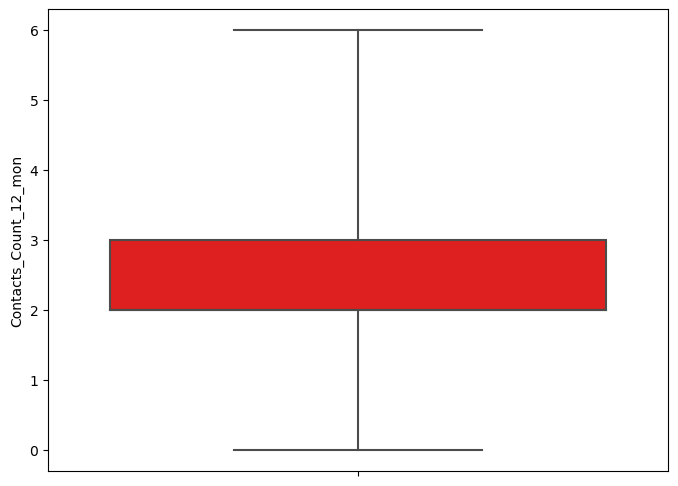

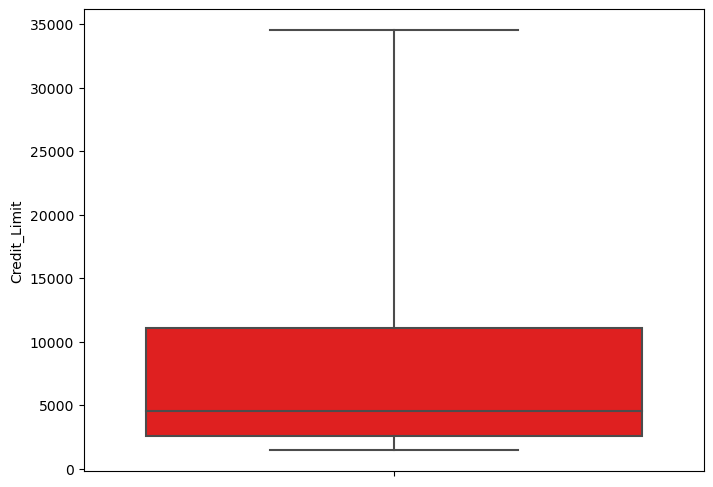

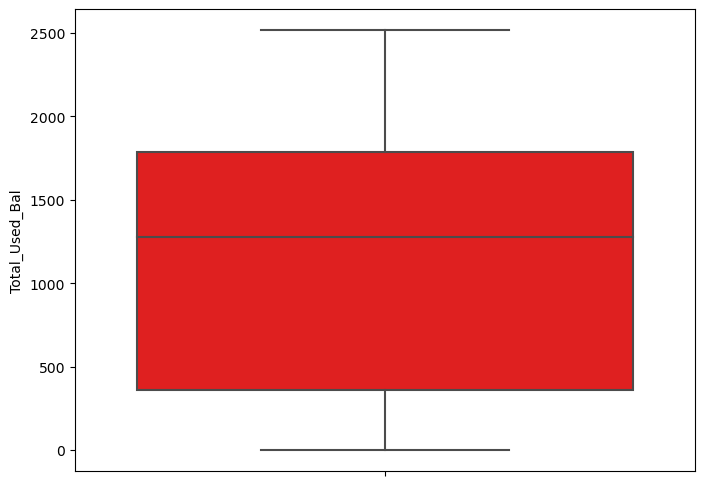

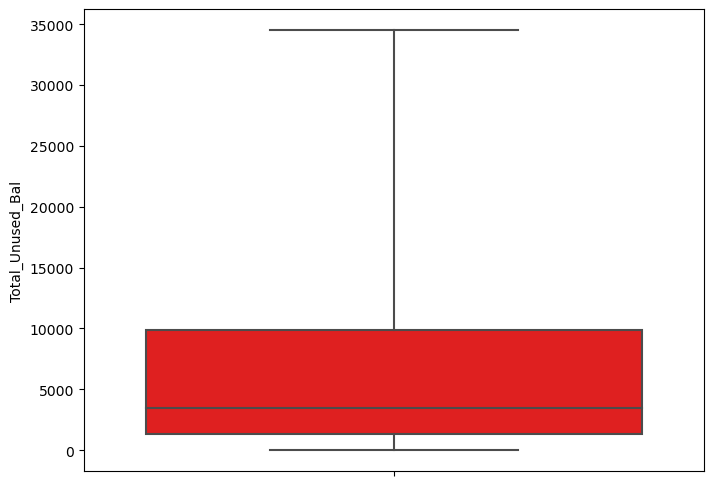

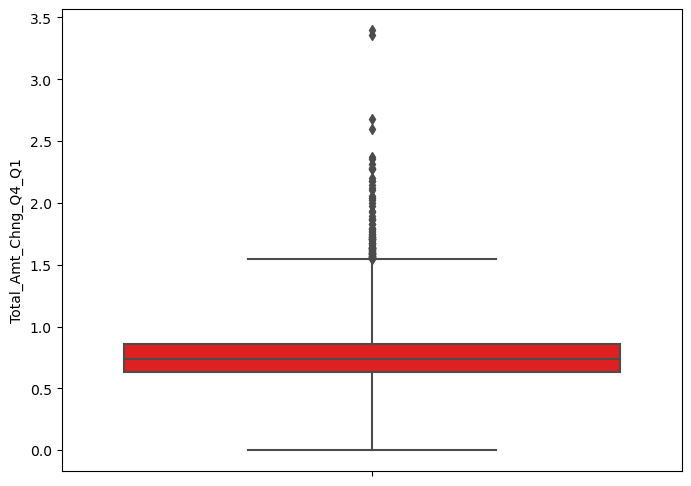

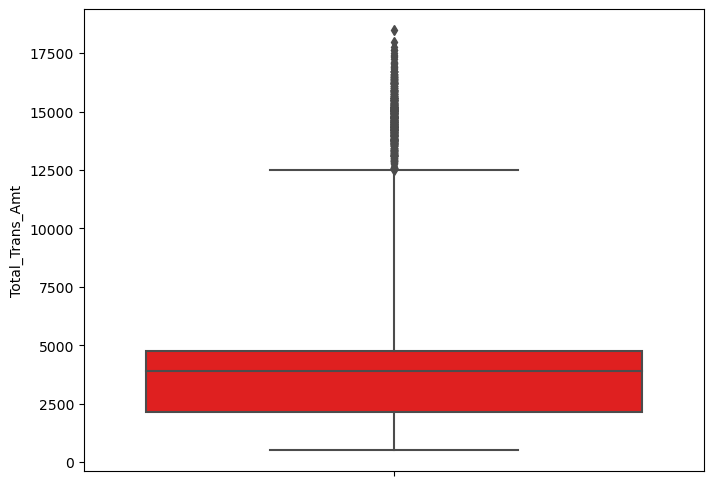

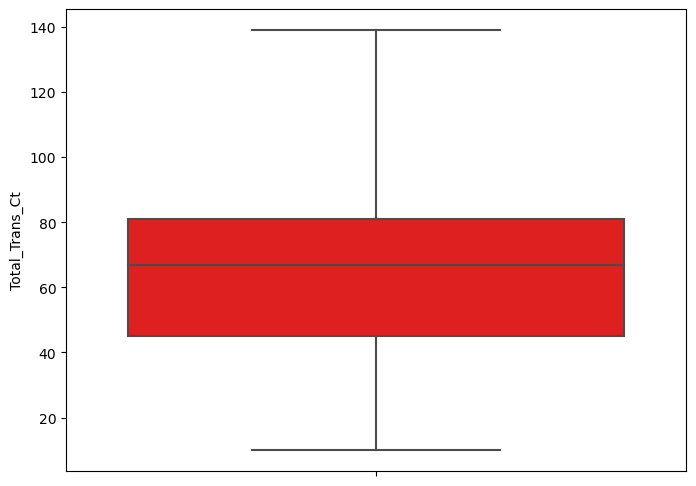

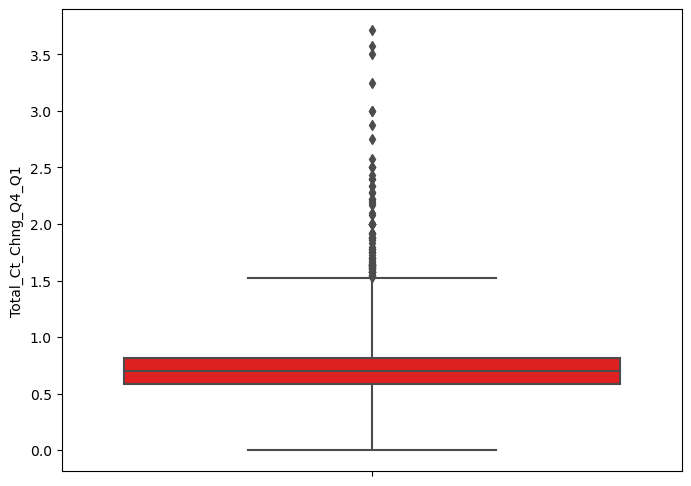

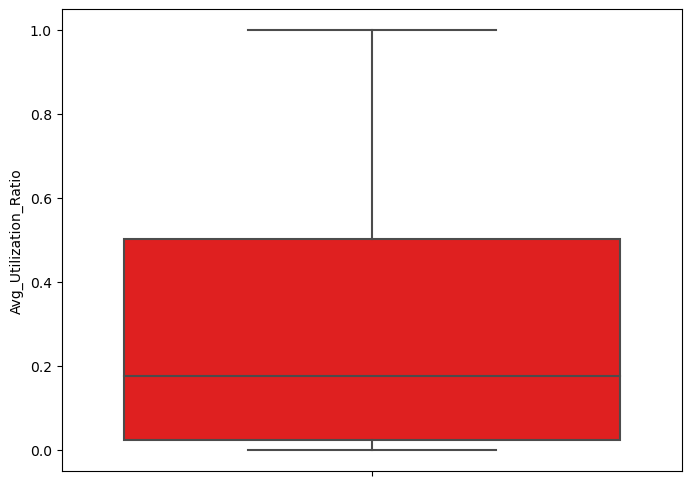

In [36]:
for col in coloane_numerice:
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(y = data[col], color = 'red', whis = 3)
    plt.show()

In [37]:
def outlier_treatment (dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1-3*IQR
    upper_limit = q3+3*IQR
    dataframe[col] = np.where(dataframe[col] < lower_limit, lower_limit, np.where(dataframe[col] > upper_limit, upper_limit, dataframe[col]))

In [39]:
data.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [41]:
multi_outlieri = ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']
print(multi_outlieri)

['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']


In [42]:
for variable in multi_outlieri:
    outlier_treatment(data, variable)

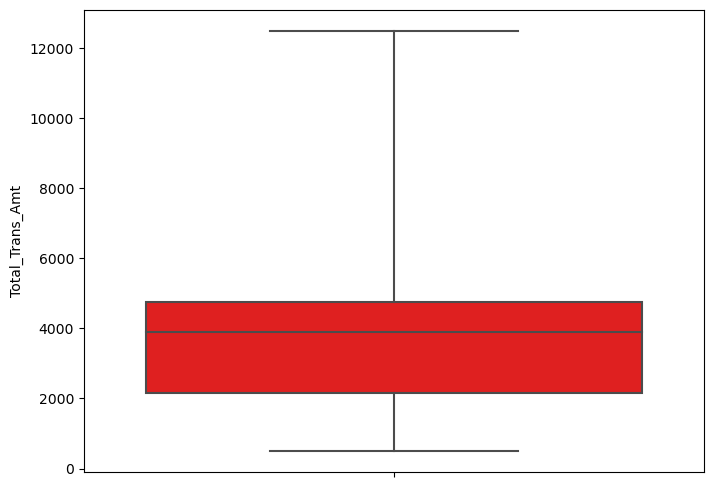

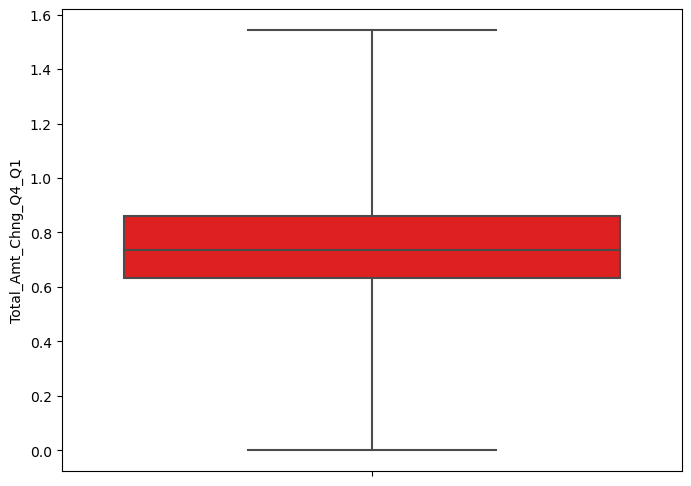

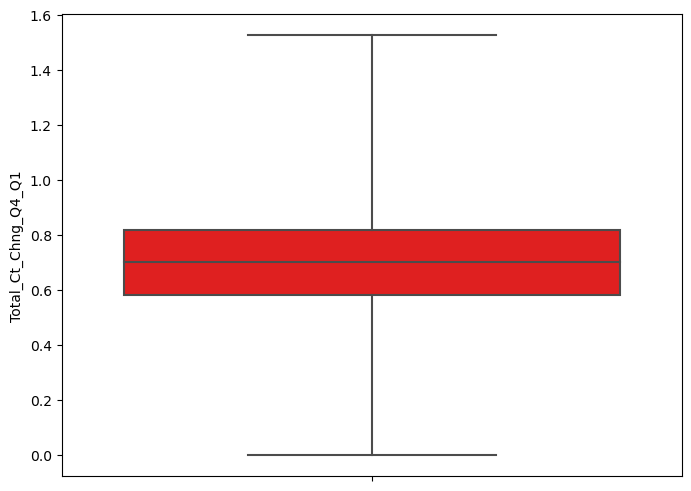

In [43]:
for col in multi_outlieri:
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(y = data[col], color = 'red', whis = 3)
    plt.show()

Corelatii:

In [44]:
correlation = data[coloane_numerice].corr()
correlation

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007561,0.007049,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.019504,-0.020926,-0.002961,0.007672,0.000266
Customer_Age,0.007561,1.000000,-0.122321,0.788890,-0.010925,0.054321,-0.018468,0.002561,0.014733,0.001239,-0.068964,-0.046050,-0.067107,-0.018824,0.007023
Dependent_count,0.007049,-0.122321,1.000000,-0.103255,-0.039189,-0.011408,-0.040632,0.068150,-0.002710,0.068379,-0.036327,0.032702,0.050590,0.011262,-0.037063
Months_on_book,0.134588,0.788890,-0.103255,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.055050,-0.037315,-0.049819,-0.018958,-0.007541
Total_Relationship_Count,0.006907,-0.010925,-0.039189,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.049542,-0.359299,-0.241891,0.041464,0.067663
Months_Inactive_12_mon,0.005729,0.054321,-0.011408,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032146,-0.036493,-0.042787,-0.043911,-0.007503
Contacts_Count_12_mon,0.005694,-0.018468,-0.040632,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.019470,-0.122814,-0.152213,-0.098280,-0.055471
Credit_Limit,0.005708,0.002561,0.068150,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012631,0.169344,0.075927,-0.006200,-0.482965
Total_Used_Bal,0.000825,0.014733,-0.002710,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.057863,0.059969,0.056060,0.095009,0.624022
Total_Unused_Bal,0.005633,0.001239,0.068379,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007441,0.163932,0.070885,-0.014717,-0.538808


<function matplotlib.pyplot.show(close=None, block=None)>

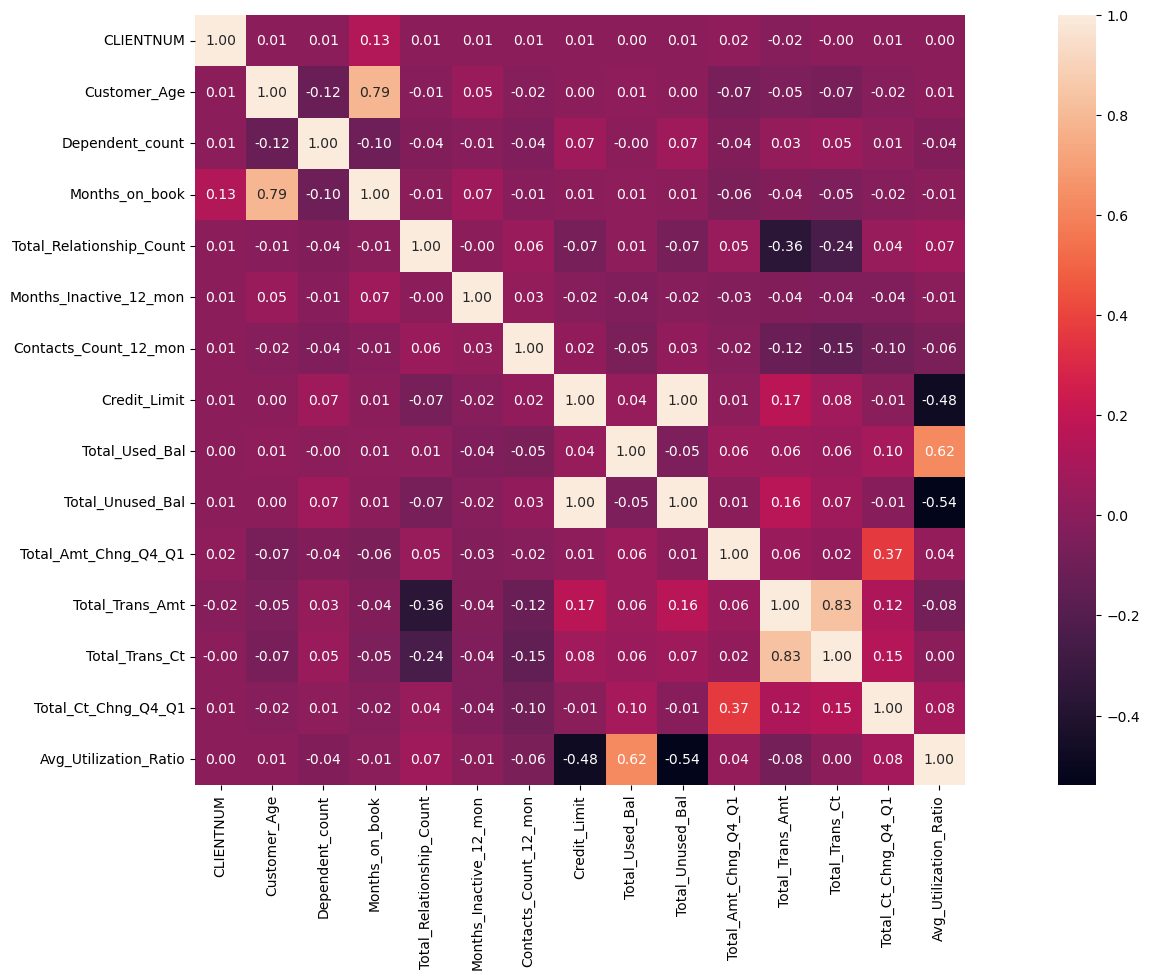

In [45]:
fig, ax = plt.subplots(figsize = (24,10))
sns.heatmap(correlation, annot = True, square = True, fmt = '.2f')
plt.show

Observam ca intre variabila Credit_Limit si Total_Unused_Bal exista o corelatie de 1 la 1, ceea ce inseamna ca existenta ambelor valori nu ne aduce nicio informatie in plus. Deci, stergem una din ele:

In [46]:
data = data.drop('Total_Unused_Bal', axis = 1)
coloane_numerice.remove('Total_Unused_Bal')

In [47]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [48]:
data.to_csv(r'C:\Users\nidfo\Desktop\TTJ\Proiect TTJ BCR\Proiect TTJ Luca Horia\Dataset1.csv')

# II. Scrierea modelelor

### Incepem prin a ne declara variabila dependenta si cele independente

In [49]:
data = pd.read_csv(r'C:\Users\nidfo\Desktop\TTJ\Proiect TTJ BCR\Proiect TTJ Luca Horia\Dataset1.csv', index_col = 'Unnamed: 0')

In [50]:
data.shape

(10127, 20)

In [51]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144.0,42,1.526,0.061
1,818770008,0,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291.0,33,1.526,0.105
2,713982108,0,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.543,1887.0,20,1.526,0.000
3,769911858,0,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171.0,20,1.526,0.760
4,709106358,0,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.543,816.0,28,1.526,0.000


In [52]:
X = data.drop(columns = 'Attrition_Flag')
y = data['Attrition_Flag']

In [53]:
X.shape, y.shape

((10127, 19), (10127,))

### Preprocesarea Datelor

In [54]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [55]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   46
Gender                          2
Dependent_count                 7
Education_Level                 7
Marital_Status                  4
Income_Category                 7
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Amt_Chng_Q4_Q1         1076
Total_Trans_Amt              4367
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           783
Avg_Utilization_Ratio         964
dtype: int64

Categorical Encoding

In [56]:
coloane_calitative = [i for i in X.columns if X[i].dtypes == 'object']
print(coloane_calitative)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [57]:
X = pd.get_dummies(X, columns = coloane_calitative)

In [58]:
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Income_Category_abc,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45.0,3.0,39,5,1,3,12691.0,777,1.335,...,0,1,0,0,0,0,1,0,0,0
1,818770008,49.0,5.0,44,6,1,2,8256.0,864,1.541,...,0,0,0,1,0,0,1,0,0,0
2,713982108,51.0,3.0,36,4,1,0,3418.0,0,1.543,...,0,0,1,0,0,0,1,0,0,0
3,769911858,40.0,4.0,34,3,4,1,3313.0,2517,1.405,...,0,0,0,1,0,0,1,0,0,0
4,709106358,40.0,3.0,21,5,1,0,4716.0,0,1.543,...,0,1,0,0,0,0,1,0,0,0


Impartim seturile de date in 2 parti: partea destinata antrenarii modelelor si cea pentru testarea acestor modele:

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 38), (2026, 38), (8101,), (2026,))

### Algoritmuri

#### Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 5, n_jobs = -1, random_state = 123)

In [61]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1,
                       random_state=123)

Prezicem rezultatele:

In [62]:
y_predict = rf.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Metrice:

In [63]:
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy score for Random Forest Classifier is:', accuracy)

Accuracy score for Random Forest Classifier is: 0.918558736426456


In [64]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[1693   12]
 [ 153  168]]


<function matplotlib.pyplot.show(close=None, block=None)>

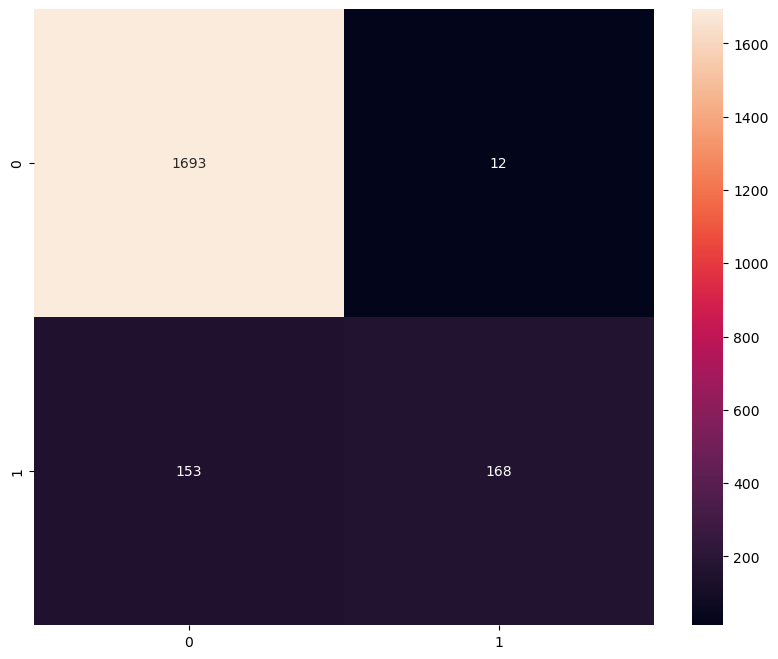

In [65]:
fig, ax = plt.subplots(figsize =(10,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show

In [66]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
print('Precizie:', precision)
print('Recall:', recall)

Precizie: 0.9333333333333333
Recall: 0.5233644859813084


In [67]:
y_train_predict = rf.predict(X_train)

In [68]:
precision = precision_score(y_train_predict, y_train)
recall = recall_score(y_train_predict, y_train)
print('Precizie:', precision)
print('Recall:', recall)

Precizie: 0.5168453292496171
Recall: 0.9208731241473397


In [69]:
auc_score = roc_auc_score(y_test, y_predict)
print ('Scorul AUC:', auc_score)

Scorul AUC: 0.7581631814070764


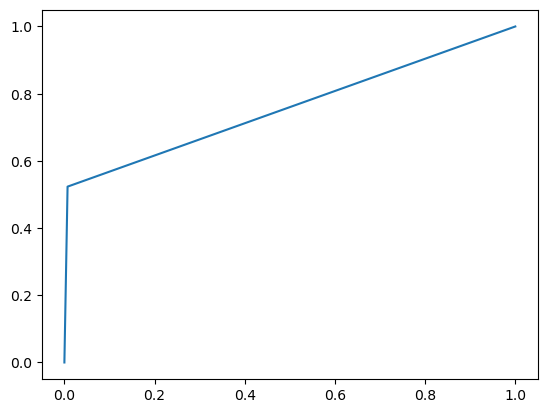

In [70]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
plt.plot(fpr,tpr)

#### XGBoost

In [71]:
xgb = XGBClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, n_jobs = -1, random_state = 10)

In [72]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [73]:
y_predict = xgb.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_predict)
print('Acuratetea pentru XGBoost:', accuracy)

Acuratetea pentru XGBoost: 0.9664363277393879


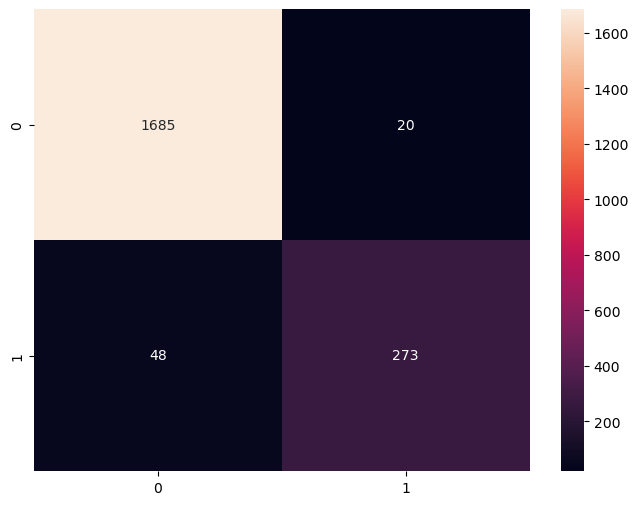

In [75]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [76]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
print ('Precizie:', precision)
print ('Recall:', recall)

Precizie: 0.931740614334471
Recall: 0.8504672897196262


In [77]:
auc_score = roc_auc_score(y_test, y_predict)
print('Scorul AUC:', auc_score)

Scorul AUC: 0.9193685422205169


### Hyperparameter tuning

In [78]:
n_estimators = [100, 200, 300]
max_depth = [3,4,5]
learning_rate=[0.1,0.05,0.15]

In [79]:
rezultate = []
for est in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            xgb = XGBClassifier(n_estimators = est, max_depth = md, learning_rate = lr, n_jobs = -1, random_state = 10, subsample = 0.6, colsample_bytree=0.5)
            xgb.fit(X_train, y_train)
            y_predict = xgb.predict(X_test)
            auc_score = roc_auc_score(y_test, y_predict)
            rezultate.append({'estimators': est, 'max_depth': md, 'learning_rate': lr,'auc': auc_score})

In [80]:
rezultate

[{'estimators': 100,
  'max_depth': 3,
  'learning_rate': 0.1,
  'auc': 0.9063209727665561},
 {'estimators': 100,
  'max_depth': 3,
  'learning_rate': 0.05,
  'auc': 0.8704040708562867},
 {'estimators': 100,
  'max_depth': 3,
  'learning_rate': 0.15,
  'auc': 0.9091429824320991},
 {'estimators': 100,
  'max_depth': 4,
  'learning_rate': 0.1,
  'auc': 0.9172243995578333},
 {'estimators': 100,
  'max_depth': 4,
  'learning_rate': 0.05,
  'auc': 0.8937685568375952},
 {'estimators': 100,
  'max_depth': 4,
  'learning_rate': 0.15,
  'auc': 0.9244260512876732},
 {'estimators': 100,
  'max_depth': 5,
  'learning_rate': 0.1,
  'auc': 0.9144023898922903},
 {'estimators': 100,
  'max_depth': 5,
  'learning_rate': 0.05,
  'auc': 0.9032057079690483},
 {'estimators': 100,
  'max_depth': 5,
  'learning_rate': 0.15,
  'auc': 0.9200464092233763},
 {'estimators': 200,
  'max_depth': 3,
  'learning_rate': 0.1,
  'auc': 0.919075287088552},
 {'estimators': 200,
  'max_depth': 3,
  'learning_rate': 0.05,
 

Din analiza listei de mai sus reiese ca modelul cu parametrii n_estimators = 300, max_depth = 3, learning_rate = 0.1 este cel mai bun.

In [81]:
best_model = XGBClassifier(n_estimators = 300, max_depth = 3, learning_rate = 0.1, n_jobs = -1, subsample = 0.6, colsample_bytree = 0.5, random_state = 123)
best_model.fit(X_train, y_train)
y_predict_train = best_model.predict(X_train)
y_predict_test = best_model.predict(X_test)
auc_score_train = roc_auc_score(y_train, y_predict_train)
auc_score_test = roc_auc_score(y_test, y_predict_test)
print('AUC train:', auc_score_train)
print('AUC test:', auc_score_test)

AUC train: 0.9766771802074988
AUC test: 0.9287143366130403


In [82]:
import pickle
with open(r'C:\Users\nidfo\Desktop\TTJ\Proiect TTJ BCR\Proiect TTJ Luca Horia\best_model_v1.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [83]:
data.to_csv(r'C:\Users\nidfo\Desktop\TTJ\Proiect TTJ BCR\Proiect TTJ Luca Horia\Dataset2.csv')

# III. Explicare

Citim setul de date, dar si fisierul modelului gasit anterior:

In [84]:
data = pd.read_csv(r'C:\Users\nidfo\Desktop\TTJ\Proiect TTJ BCR\Proiect TTJ Luca Horia\Dataset2.csv', index_col = 'Unnamed: 0')

with open(r'C:\Users\nidfo\Desktop\TTJ\Proiect TTJ BCR\Proiect TTJ Luca Horia\best_model_v1.pkl', 'rb') as file:
    model = pickle.load(file)

In [85]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144.0,42,1.526,0.061
1,818770008,0,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291.0,33,1.526,0.105
2,713982108,0,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.543,1887.0,20,1.526,0.000
3,769911858,0,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171.0,20,1.526,0.760
4,709106358,0,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.543,816.0,28,1.526,0.000


In [86]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [87]:
#independent variables
X = data.drop(columns = ['Attrition_Flag'])

#target variable
y = data['Attrition_Flag']

In [88]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144.0,42,1.526,0.061
1,818770008,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291.0,33,1.526,0.105
2,713982108,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.543,1887.0,20,1.526,0.000
3,769911858,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171.0,20,1.526,0.760
4,709106358,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.543,816.0,28,1.526,0.000


In [89]:
X.dtypes

CLIENTNUM                     int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [90]:
X.nunique()

CLIENTNUM                   10127
Customer_Age                   46
Gender                          2
Dependent_count                 7
Education_Level                 7
Marital_Status                  4
Income_Category                 7
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Amt_Chng_Q4_Q1         1076
Total_Trans_Amt              4367
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           783
Avg_Utilization_Ratio         964
dtype: int64

Categorical encoding:

In [91]:
#categorical encoding
categorical_columns = [col for col in X.columns if X[col].dtypes == 'object']
X = pd.get_dummies(X, columns = categorical_columns)

In [92]:
y.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    1
Name: Attrition_Flag, Length: 100, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 38), (2026, 38), (8101,), (2026,))

In [95]:
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [96]:
y_predict_proba = model.predict_proba(X_test)
print(y_predict_proba)

[[9.9942273e-01 5.7727023e-04]
 [9.9018621e-01 9.8137734e-03]
 [9.9281770e-01 7.1822791e-03]
 ...
 [9.9882632e-01 1.1736797e-03]
 [9.9530452e-01 4.6954518e-03]
 [9.9995667e-01 4.3353011e-05]]


In [97]:
y_predict_proba_class_1 = y_predict_proba[:,1]
print(y_predict_proba_class_1)

[5.7727023e-04 9.8137734e-03 7.1822791e-03 ... 1.1736797e-03 4.6954518e-03
 4.3353011e-05]


Performance Metrics

In [98]:
auc_score = roc_auc_score(y_test, y_predict_proba_class_1)
print(auc_score)

0.9979601211178086


In [99]:
#declare an empty dataframe
lift_gain_report = pd.DataFrame()

#add y_test in DataFrame
lift_gain_report['y_test'] = y_test

#step 1 - add predict probabilities for class 1
lift_gain_report['Predicted Probabilities'] = y_predict_proba_class_1

#order probabilities in ascending order
lift_gain_report['Probabilities Rank'] = lift_gain_report['Predicted Probabilities'].rank(method = 'first', ascending = True, pct = True)


# step 2 -  calculate decile group
lift_gain_report['Decile group'] = np.floor((1 - lift_gain_report['Probabilities Rank'])*10) + 1


#step 3 - group observations by decile
lift_gain_report['Number of observations'] = 1
lift_gain_report = lift_gain_report.groupby(['Decile group']).sum().reset_index()

#cumulative number of observations
lift_gain_report['Cumulative no. of observations'] = lift_gain_report['Number of observations'].cumsum()

#cumulative percentage of observations
lift_gain_report['Cumulative % of no. of observations'] = lift_gain_report['Cumulative no. of observations']/ lift_gain_report['Cumulative no. of observations'].max()


#step 4 - calculate number of positives cumulative
lift_gain_report['Cumulative no. of positives'] = lift_gain_report['y_test'].cumsum()


#step 5 - calculate cumulative percentage of positives (Gain)
lift_gain_report['Gain'] = lift_gain_report['Cumulative no. of positives']/lift_gain_report['Cumulative no. of positives'].max()


lift_gain_report['Lift'] = lift_gain_report['Gain'] / lift_gain_report['Cumulative % of no. of observations']


print(lift_gain_report)

   Decile group  y_test  Predicted Probabilities  Probabilities Rank  \
0           1.0     202               198.707596          192.880059   
1           2.0     107               100.225220          172.539980   
2           3.0       2                 8.022520          151.500000   
3           4.0       0                 2.082700          131.960020   
4           5.0       0                 0.773325          111.119941   
5           6.0       0                 0.348930           91.380059   
6           7.0       0                 0.184625           71.039980   
7           8.0       0                 0.103108           50.500000   
8           9.0       0                 0.053738           30.460020   
9          10.0       0                 0.020220           10.119941   

   Number of observations  Cumulative no. of observations  \
0                     203                             203   
1                     203                             406   
2                     20

### 4.3. Lift and Gain charts
 
a) Lift chart

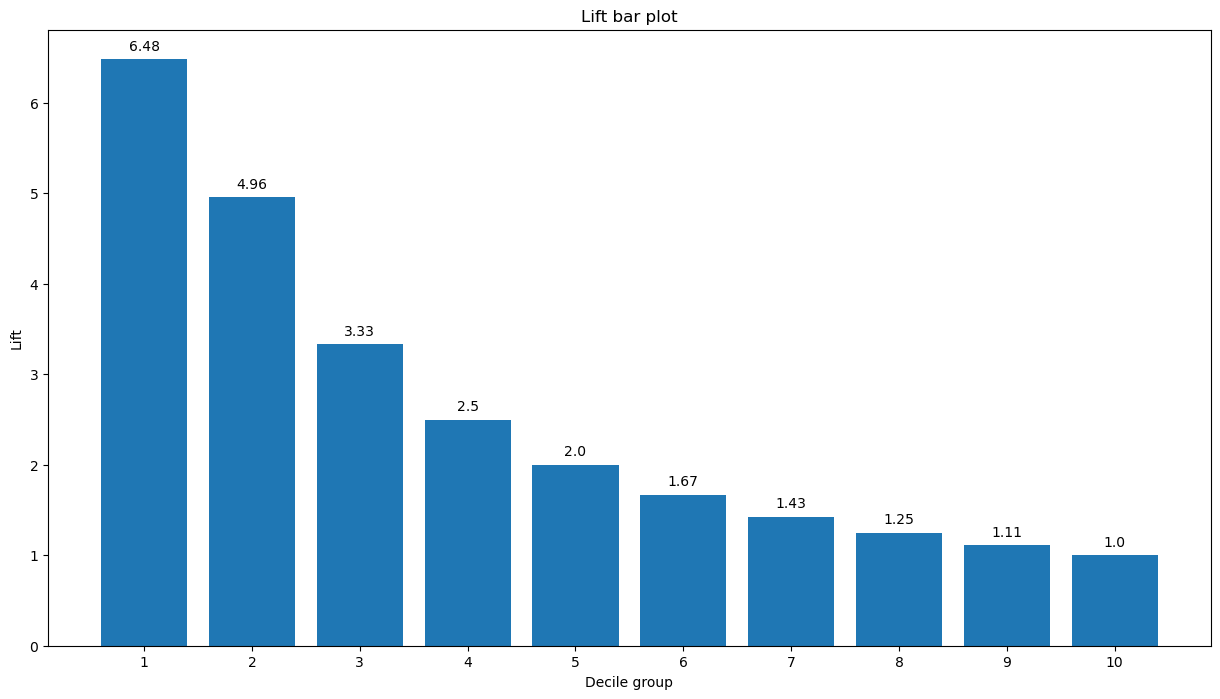

In [100]:
fig, ax=plt.subplots(figsize=(15,8))
barplot=plt.bar(lift_gain_report['Decile group'], lift_gain_report['Lift'])
plt.title('Lift bar plot')
plt.xlabel('Decile group')
plt.ylabel('Lift')
plt.xticks(lift_gain_report['Decile group'])

#add text above bars in chart
for b in barplot:
    plt.text(b.get_x() + b.get_width() / 2, b.get_height() + 0.1, round(b.get_height(), 2), ha = 'center')

plt.show()

b) Gain chart

In [101]:
lift_gain_report['Random Selection']=lift_gain_report['Decile group']/lift_gain_report['Decile group'].max()
lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift,Random Selection
0,1.0,202,198.707596,192.880059,203,203,0.100197,202,0.649518,6.482378,0.1
1,2.0,107,100.225220,172.539980,203,406,0.200395,309,0.993569,4.958057,0.2
2,3.0,2,8.022520,151.500000,202,608,0.300099,311,1.000000,3.332237,0.3
3,4.0,0,2.082700,131.960020,203,811,0.400296,311,1.000000,2.498150,0.4
4,5.0,0,0.773325,111.119941,202,1013,0.500000,311,1.000000,2.000000,0.5
5,6.0,0,0.348930,91.380059,203,1216,0.600197,311,1.000000,1.666118,0.6
6,7.0,0,0.184625,71.039980,203,1419,0.700395,311,1.000000,1.427766,0.7
7,8.0,0,0.103108,50.500000,202,1621,0.800099,311,1.000000,1.249846,0.8
8,9.0,0,0.053738,30.460020,203,1824,0.900296,311,1.000000,1.110746,0.9
9,10.0,0,0.020220,10.119941,202,2026,1.000000,311,1.000000,1.000000,1.0


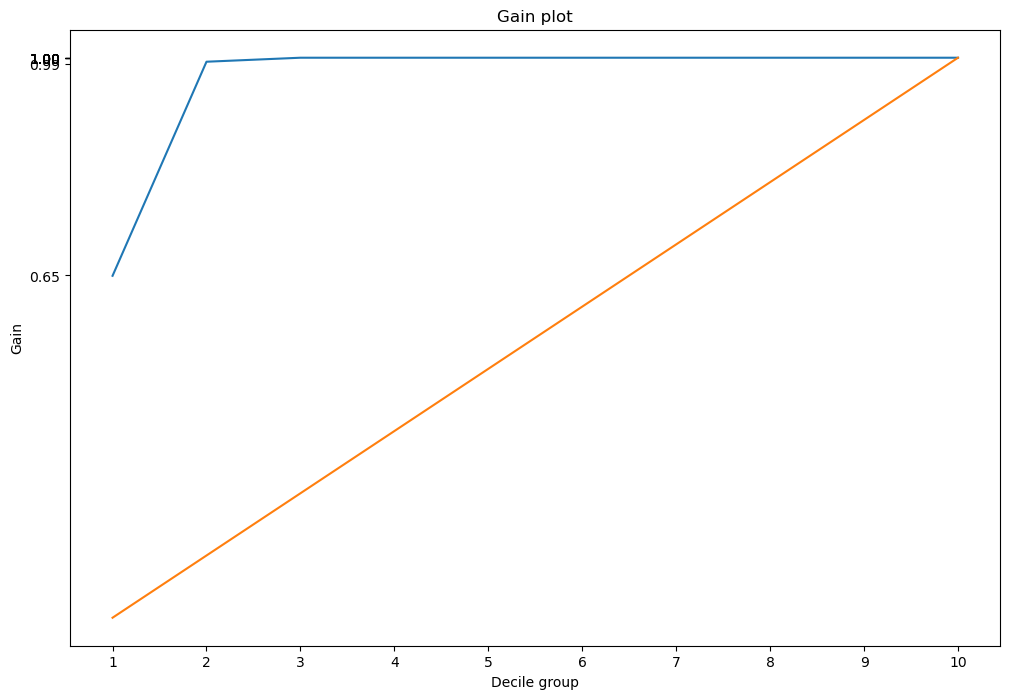

In [102]:
fig, ax=plt.subplots(figsize=(12,8))
sns.lineplot(data=lift_gain_report, x=lift_gain_report['Decile group'], y=lift_gain_report['Gain'])
sns.lineplot(data=lift_gain_report, x=lift_gain_report['Decile group'], y=lift_gain_report['Random Selection'])
plt.title('Gain plot')
plt.xticks(lift_gain_report['Decile group'])
plt.yticks(round(lift_gain_report['Gain'],2))
plt.show()

Stabilim nivelul de influenta a fiecarui factor asupra variabilei tinta: 

In [103]:
feat_imp=model.get_booster().get_score(importance_type='total_gain')
print (feat_imp)

{'CLIENTNUM': 230.12220764160156, 'Customer_Age': 551.598388671875, 'Dependent_count': 72.3797378540039, 'Months_on_book': 328.8735046386719, 'Total_Relationship_Count': 1526.0791015625, 'Months_Inactive_12_mon': 681.6725463867188, 'Contacts_Count_12_mon': 477.2265930175781, 'Credit_Limit': 441.3855285644531, 'Total_Used_Bal': 1754.011962890625, 'Total_Amt_Chng_Q4_Q1': 1332.4649658203125, 'Total_Trans_Amt': 5867.037109375, 'Total_Trans_Ct': 5004.283203125, 'Total_Ct_Chng_Q4_Q1': 2059.9931640625, 'Avg_Utilization_Ratio': 1158.9346923828125, 'Gender_F': 142.44747924804688, 'Gender_M': 36.882049560546875, 'Education_Level_College': 3.401651382446289, 'Education_Level_Doctorate': 2.9226572513580322, 'Education_Level_Graduate': 5.9027204513549805, 'Education_Level_High School': 8.384117126464844, 'Education_Level_Post-Graduate': 6.052490711212158, 'Education_Level_Uneducated': 11.09431266784668, 'Education_Level_Unknown': 2.993252754211426, 'Marital_Status_Divorced': 6.425260543823242, 'Mar

In [104]:
feature_importance=pd.DataFrame()
feature_importance['Variable']=feat_imp.keys()
feature_importance['Importance value']=feat_imp.values()
feature_importance['% Importance value']=feature_importance['Importance value']/feature_importance['Importance value'].sum()*100
feature_importance.sort_values(by=['Importance value'], ascending=False)

,Variable,Importance value,% Importance value
10,Total_Trans_Amt,5867.037109,26.791039
11,Total_Trans_Ct,5004.283203,22.851389
12,Total_Ct_Chng_Q4_Q1,2059.993164,9.406683
8,Total_Used_Bal,1754.011963,8.009461
4,Total_Relationship_Count,1526.079102,6.968636
9,Total_Amt_Chng_Q4_Q1,1332.464966,6.084523
13,Avg_Utilization_Ratio,1158.934692,5.292120
5,Months_Inactive_12_mon,681.672546,3.112766
1,Customer_Age,551.598389,2.518800
6,Contacts_Count_12_mon,477.226593,2.179191


Acest lucru se poate vedea cel mai bine pe o diagrama SHAP:

In [105]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


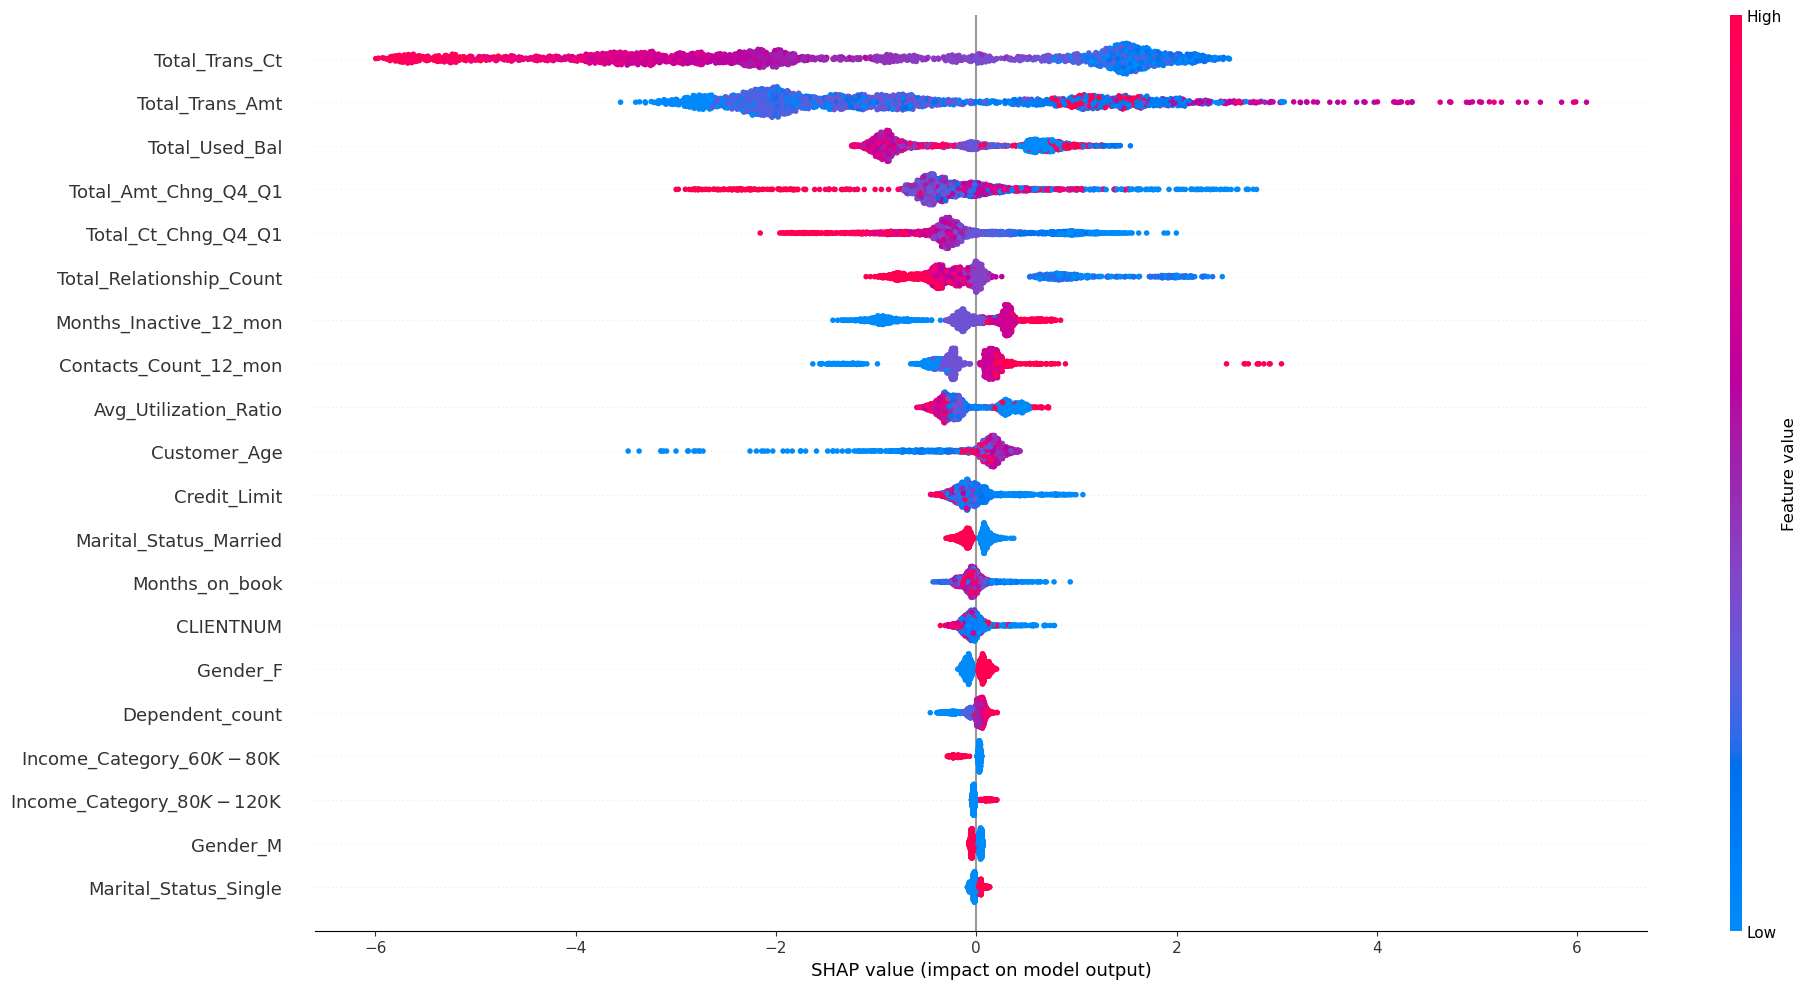

In [106]:
shap.summary_plot(shap_values, X_test, plot_size=(20,10))

In [107]:
index=12
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[index],X_test.iloc[index])

In [108]:
index=67
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[index],X_test.iloc[index], link = 'logit')

# D. Interpretare

### Din cercetarile statistice facute anterior reies urmatoarele informatii:

In [109]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144.0,42,1.526,0.061
1,818770008,0,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291.0,33,1.526,0.105
2,713982108,0,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.543,1887.0,20,1.526,0.000
3,769911858,0,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171.0,20,1.526,0.760
4,709106358,0,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.543,816.0,28,1.526,0.000


Printre factorii cei mai importanti in luarea deciziei de catre clienti de a renunta la serviciile bancii noastre se enumera:
- "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1" - Cu cat cun client a facut mai putine tranzactii, cu atat de mult are sanse sa renunte la serviciile bancii noastre;

- "Total_Trans_Amt", "Total_Amt_Chng_Q4_Q1" - Cu cat valoarea total a tranzactiilor facute de catre un client este mai mic, cu atat de mult are sanse sa renunte la serviciile bancii noastre (aceasta corelatie este mai slaba decat cea cu numarul efectiv al tranzactiilor);

- "Total_Used_Bal" - Cu cat un client isi foloseste mai putin suma de bani din cont, cu atat are sanse mai mari sa-si extraga toti banii deodata si sa renunte la serviciile bancii noastre;

- "Total_Relationship_Count" - Cu cat un client are mai putine produse in portofoliu, cu atat are sanse mai mari sa renunte la serviciile bancii noastre;

- "Customer_Age" - In medie, clientii mai tineri (pana in jur de 30 de ani) tind sa renunte mai greu la serviciile bancii noastre. O cauza probabila acest lucru consta in faptul ca tinerii sunt mai experimentati in ceea ce priveste digitalizarea, fiind astfel mai expusi catre materiale promotionale si anunturi de oferte noi. 